# **Hexa Avengers (E-Commerce Shipping Data)** #

# **Import Library**

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import shap
import warnings
warnings.filterwarnings('ignore')

In [96]:
sns.set_palette("Set2")
sns.set_style("whitegrid")
colorArr = sns.color_palette("Set2")

# **Info Dataset**

Dataset yang digunakan merupakan dataset [E-Commerce Shipping Data](https://www.kaggle.com/datasets/prachi13/customer-analytics) yang diambil dari kaggle yang terdiri dari 10999 baris dan 12 kolom. Kolom pada dataset ini terdiri dari:
- **ID**: ID Number of Customers.
- **Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- **Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.
- **Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.
- **Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- **Cost of the product**: Cost of the Product in US Dollars.
- **Prior purchases**: The Number of Prior Purchase.
- **Product importance**: The company has categorized the product in the various parameter such as low, medium, high.
- **Gender**: Male and Female.
- **Discount offered**: Discount offered on that specific product.
- **Weight in gms**: It is the weight in grams.
- **Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

## Load Dataset

In [97]:
sheet_id = '1P5-8XwOXjr_zSiJ-U5W1VhqHIHKqUjUe2CwW_Rd9iCQ'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv'
df = pd.read_csv(url)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# **Info Bisnis**

## Problem

<div style="text-align: justify">
<p>
PT. Avengers adalah sebuah perusahaan yang bergerak dalam bidang e-commerce. Didirikan tahun 2022 dan kini memiliki 10.999 transaksi yang tercatat dalam database. Pimpinan hendak mengevaluasi terkait kinerja divisi shipping terkait temuan bahwa  sebanyak 6.563 (59.7%) dari total transaksi mengalami keterlambatan pengiriman yang diduga mempengaruhi penilaian customer terhadap kinerja perusahaan.
</p>
<p>
Tim bisnis menugaskan tim data untuk melakukan analisis terhadap data yang disediakan perusahaan untuk mengidentifikasi penyebab keterlambatan pengiriman sehingga dapat memberi rekomendasi terkait penyelesaian problem not on time rate yang tinggi.
</p>
</div>


## Peran

Sebagai Tim Data yang terdiri dari
- Project Leader: Kevin Usmayadhy Wijaya
- Data Analyst: Vicky Clarissa Jennie Damara
- Data Scientist : Nabil Abduh Aqil
- Machine Learning Engineer: Febiya Jomy Pratiwi
- Business Analyst: Qistina Muharrifa & Riel Jeremy Jordan Umboh

## Goal

Goal yang ingin dicapai adalah Menurunkan persentase keterlambatan barang


## Objective

- Membuat model klasifikasi yang bisa memprediksi keterlambatan barang sehingga perusahaan dapat memberikan notifikasi keterlambatan kepada customer
- Mengetahui faktor-faktor yang mempengaruhi keterlambatan


## Business Metrics

Not on-time Rate / Late Rate (Persentase produk yang tidak tepat waktu)

---
# **EDA, Insights & Visualization**
---

## Descriptive Statistics

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


- Semua colomn sudah terisi sehingga tidak perlu dilakukan handling missing value
- Jika dilihat dari columnnya semua sudah memiliki tipe yang sesuai. Nama colomn **Reach.on.Time_Y.N** diubah agar tidak membingungkan menjadi **Is_Late** karena value 1 merepresentasikan produk terlambat (tidak on time) dan 0 merepresentasikan produk tidak terlambat (on time) sehingga kurang sesuai dengan nama colomn Reach.on.Time_Y.N.



In [99]:
df.rename(columns = {'Reached.on.Time_Y.N':'Is_Late'}, inplace = True)

In [100]:
category = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Is_Late']
number = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

In [101]:
df[category].describe()

,Is_Late
count,10999.000000
mean,0.596691
std,0.490584
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


Berdasarkan unique values, semua variabel sesuai nilainya pada deskripsi dataset, tidak ada kesalahan input.  Berdasarkan frequencies dan top frequent dapat terlihat bahwa:
- Pengiriman cenderung terlambat **(Is_Late)** sebanyak **6563**.
- Penyimpanan dominan pada **Warehouse_Block F** sebanyak **3866**.
- **Product_Importance** dengan kategori **Low** sebanyak **5297**,
- Pengiriman **Gender** paling dominan adalah **F (Female)** sebanyak **5545**.
- Barang dikirim menggunakan **Mode of Shipment** terbesar yaitu **Ship** sebanyak 7462, Hal ini menandakan adanya ketimpangan kelas yang besar dibandingkan jenis pengiriman lainnya.


In [102]:
df[number].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


- **Customer_care_calls** : customer **minimal** melakukan telepon sebanyak *2 kali *dengan rata-rata (**mean**) *4 kali*  dan **maksimal** **7 kali**
- **Customer_rating**: : customer memberikan **minimal rating 1** dengan **rata-rata (mean) nilai 3** dan **maksimal rating 5**
- **Cost_of_the_product** : customer membeli barang dengan harga **minimal 96 USD** dengan **rata-rata (mean) harga 210 USD** dan **maksimal harga 310 USD**.
- **Prior Purchase** : customer melakukan pembelian **minimal** sebanyak **2 kali** dengan **rata-rata pembelian (mean) 3.6 kali** dan **maksimal 10 kali**,
- **Discount offered** : customer **minimal** mendapatkan **1% diskon** dengan **rata-rata (mean)** **13,37%**, dengan diskon maksimal **65%**.
- **Weights in gms** : Berat barang yang dipesan customer **minimal 1001 gram** dengan **rata-rata (mean) 3634 gram** dan maksimal **berat barang sebesar 7846 gram**.


## Univariate Analysis

### Numerical

Untuk melihat univariate analysis dari data numerik, kami menggunakan **violin plot** untuk mengecek persebaran datanya

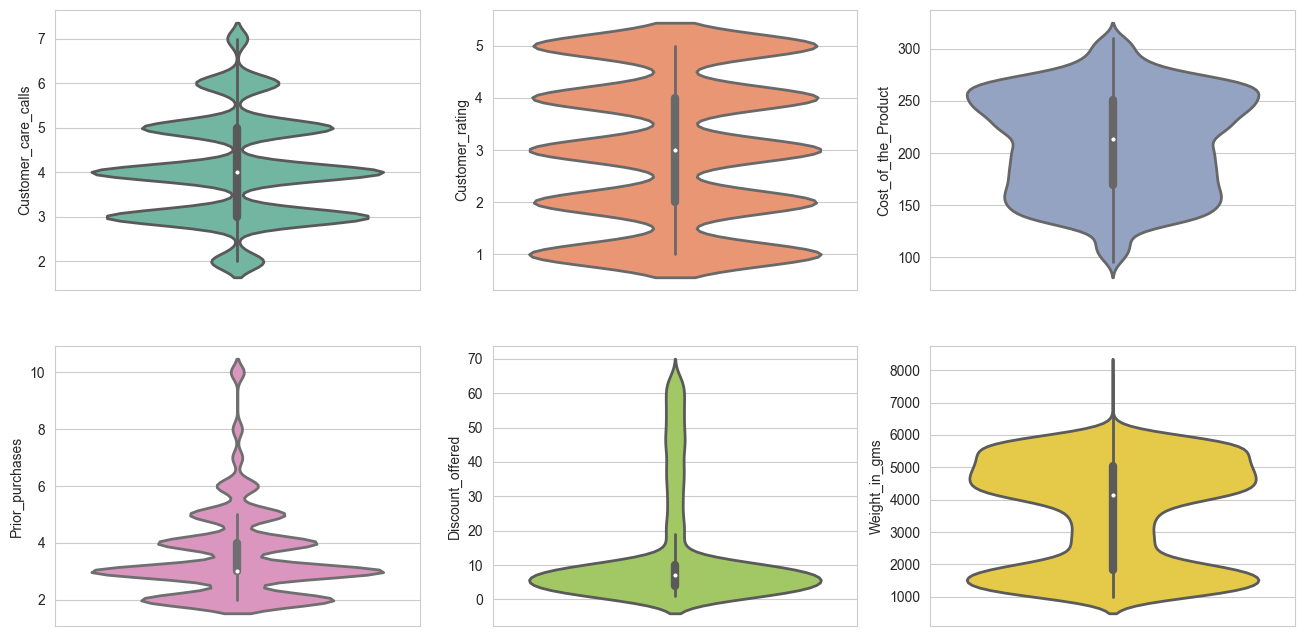

In [103]:
plt.figure(figsize=(16, 8))
for i in range (0, len(number)):
  plt.subplot(math.ceil(len(number)/3), 3, i+1)
  sns.violinplot(data=df, y=number[i], linewidth=2, orient='v', color = colorArr[i])

Selain itu juga kami mengecek persebaran data yang dipisah berdasarkan colomn targetnya untuk melihat perbedaan persebaran data antara kelas yang on time dengan yang tidak ontime.

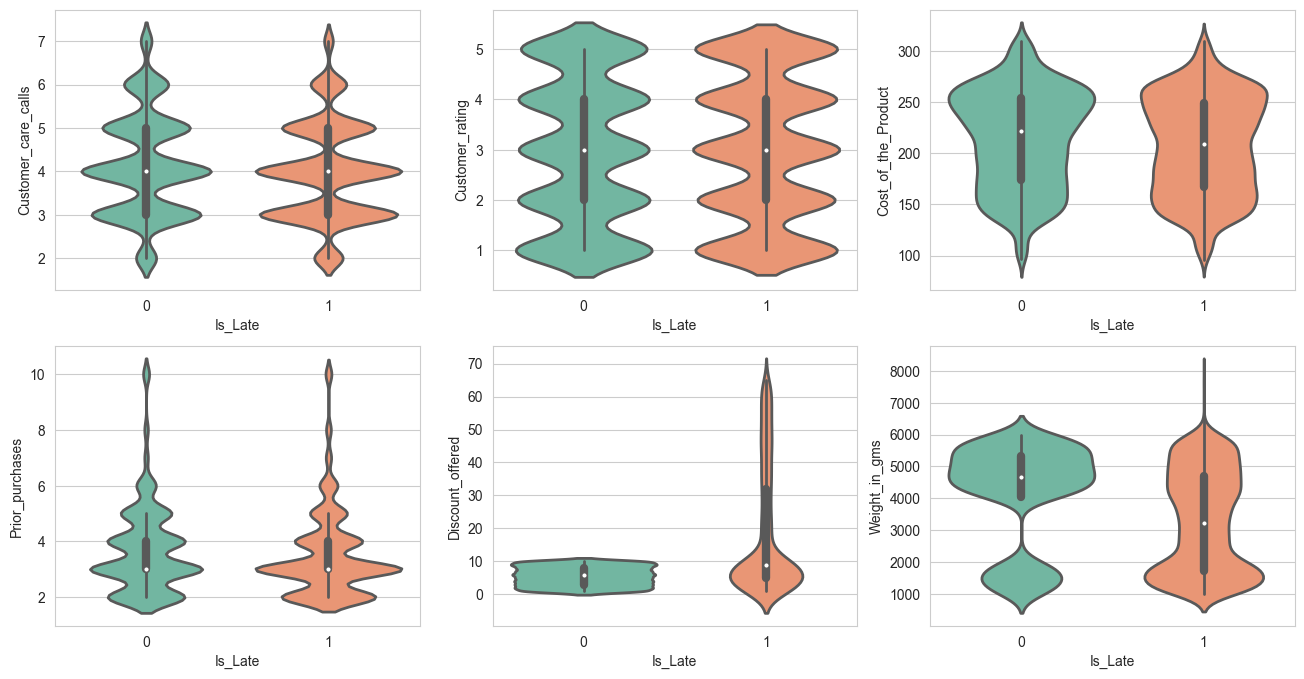

In [104]:
plt.figure(figsize=(16, 8))
for i in range (0, len(number)):
  plt.subplot(math.ceil(len(number)/3), 3, i+1)
  sns.violinplot(data=df, y=number[i], x='Is_Late', linewidth=2)

Berdasarkan hasil dari boxplot sebelumnya, dapat ditarik beberapa kesimpulan diantaranya:
- Column Prior_purchases dan Discount_offered secara keseluruhan terdapat nilai outlier yang tidak normal sehingga perlu dilakukan penanganan khusus (bisa didrop atau direplace).
- Setelah dipisah berdasarkan targetnya, column Discount_offered dan Weight_in_gms memiliki perbedaan persebaran data yang cukup signifikan pada produk yang on-time dan yang tidak on-time. Oleh karena itu, column ini bisa kita tandai sebagai column yang berkemungkinan berpengaruh terhadap ketepatan produk yang dikirim.
- Selain column diatas, persebarannya normal.
- Produk seberat 1000-2000 gram paling banyak. Produk dengan berat 2000-4000 gms cenderung sedikit.

### Categorical

Untuk melihat univariate analysis dari data categorical, kami menggunakan **Count Plot** untuk mengecek persebaran datanya

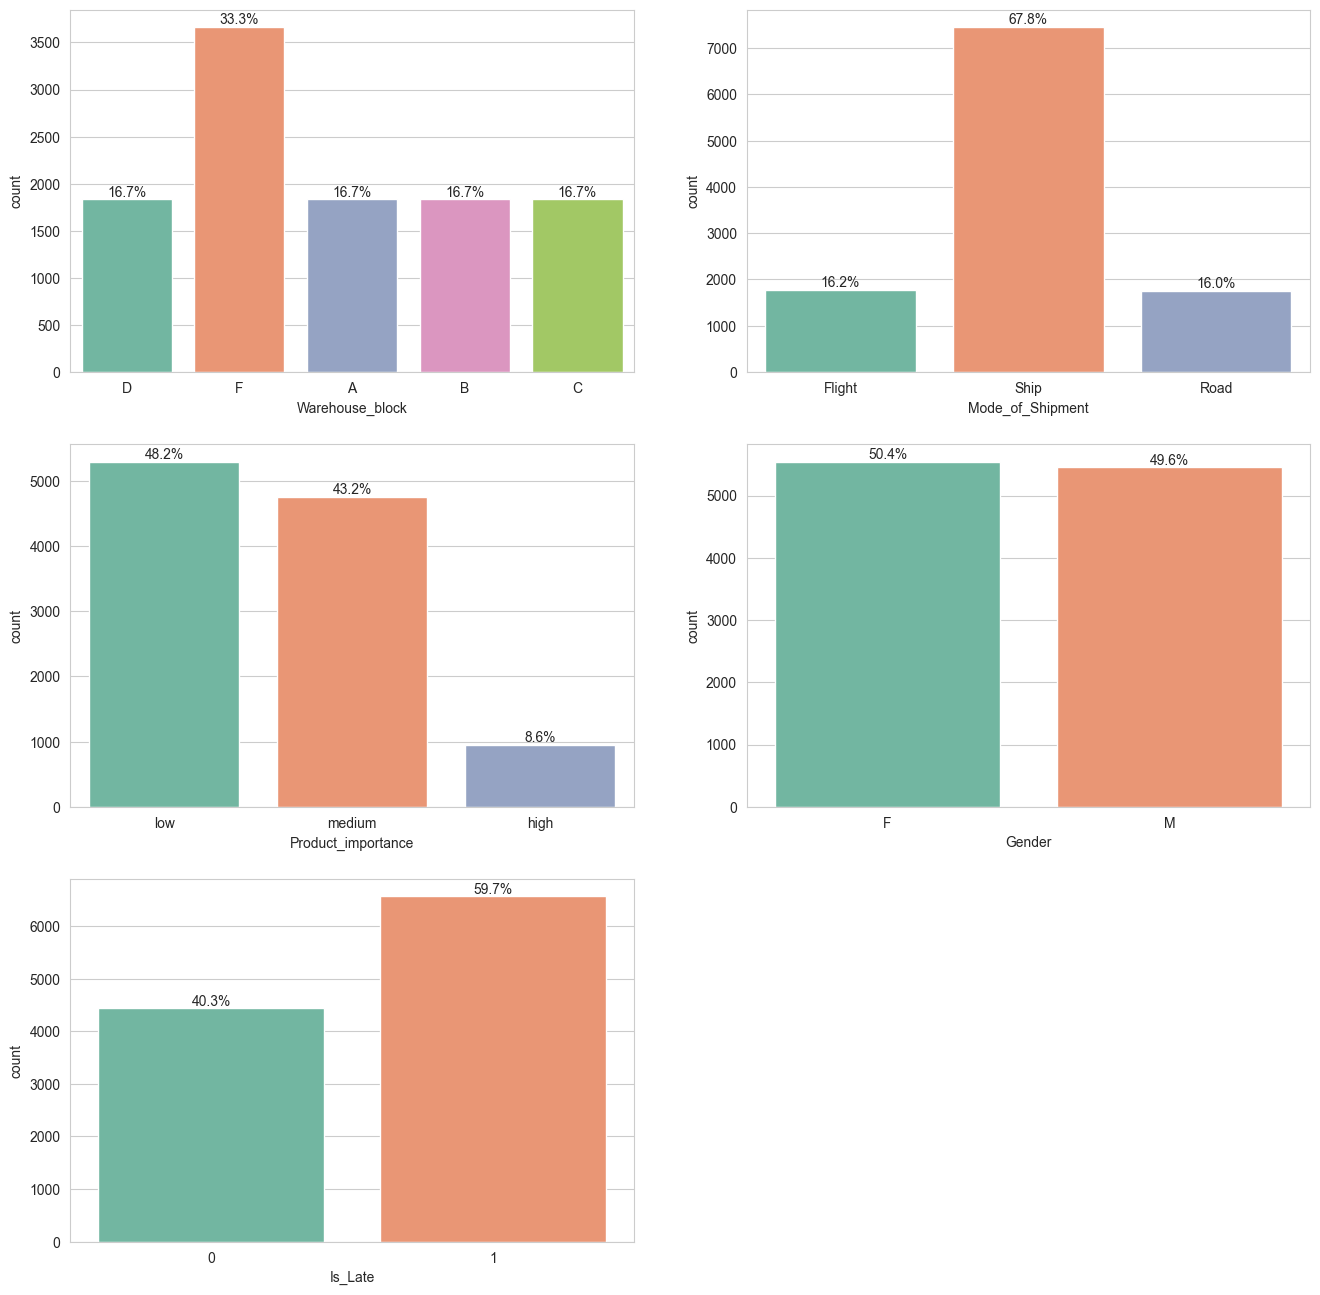

In [105]:
plt.figure(figsize=(16, 16))
for i in range (0, len(category)):
  plt.subplot(math.ceil(len(category)/2), 2, i+1)
  ax = sns.countplot(data=df, x=category[i])
  for c in ax.containers:
    labels = [f'{h/df[category[i]].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [106]:
category.remove('Is_Late')
category

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

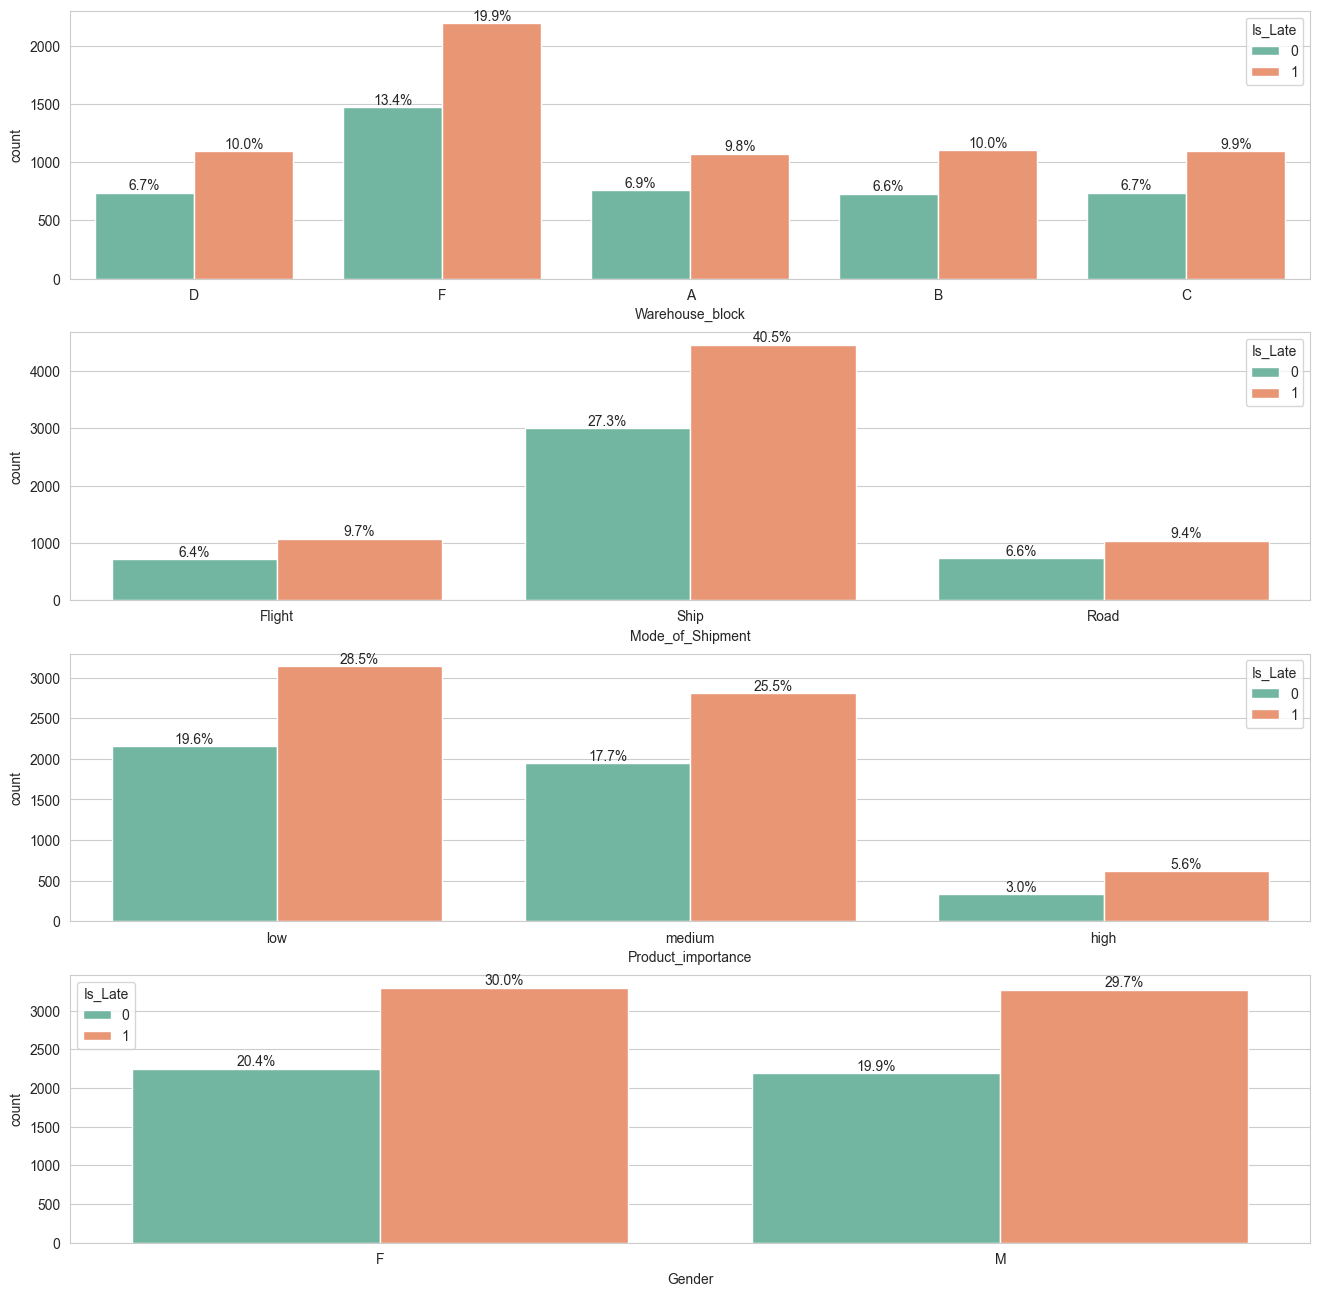

In [107]:
plt.figure(figsize=(16, 16))
for i in range (0, len(category)):
  plt.subplot(math.ceil(len(category)/1), 1, i+1)
  ax = sns.countplot(data=df, x=category[i], hue='Is_Late')

  for c in ax.containers:
    labels = [f'{h/df[category[i]].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

Berdasarkan hasil dari countplot diatas, dapat ditarik beberapa kesimpulan diantaranya:
1. Sebelum Dipisah
- Persebaran pada column **Warehouse_block** terdapat 1 block yang memiliki **jumlah yang jauh lebih banyak** dengan block lainnya, yaitu **block F**.
- Pada column **Mode_of_Shipment** terdapat 1 mode yang memiliki **jumlah jauh lebih banyak** dibandingkan dengan mode lainnya yaitu mode pengiriman menggunakan **Ship**.
- Pada column **Product_importance** terdapat 1 kategori importance yang memiliki **jumlah jauh lebih sedikit** dibandingkan dengan kategori lainnya yaitu kategori **High**.
- Pada column **Gender tidak ada perbandingan yang signifikan**.
- Pada column **Is_Late**, perbandingan data yang **late:ontime** sekitar sebesar **3:2**
2. Setelah Dipisah
- Persebaran data pada column yang dipisah berdasarkan column targetnya, **tidak ada perbedaan yang signifikan antara target disetiap kategorinya**

## Multivariate Analysis

In [108]:
number.append('Is_Late')
number

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Is_Late']

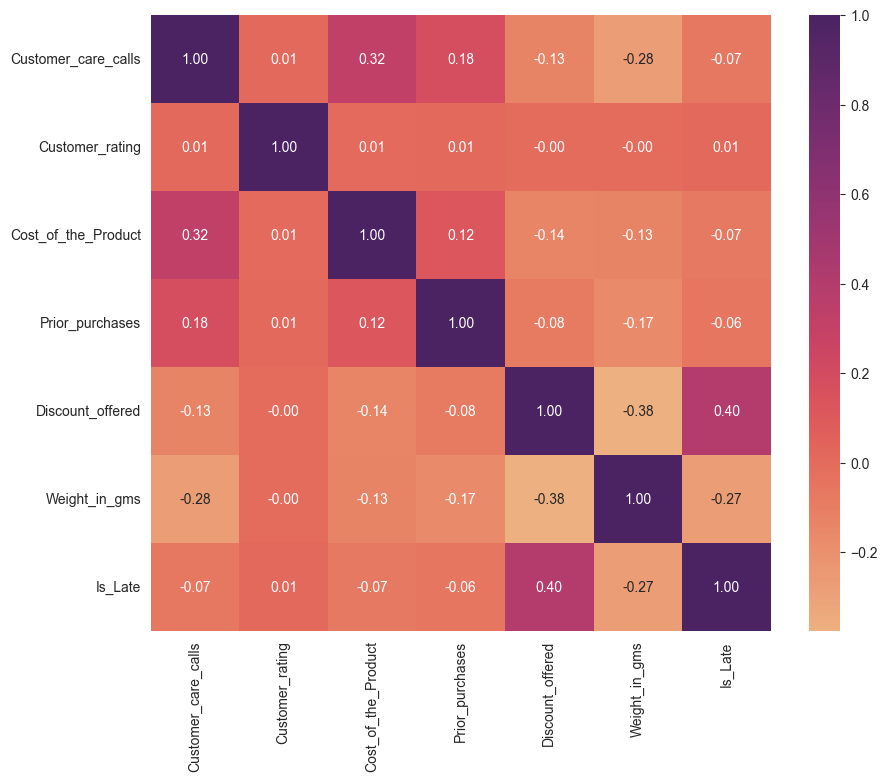

In [109]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[number].corr(), cmap='flare', annot=True, fmt='.2f')
plt.show()

Berdasarkan matrix korelasi dapat disimpulkan bahwa:

**Positif Correlation**
- Adanya korelasi positif antara Discount_offered dengan Is_Late sebesar 40%. Tingginya discount yang ditawarkan menyebabkan banyaknya barang yang mengalami keterlambatan.
- Adanya korelasi positif antara Customer_care_calls dengan Cost_of_the_Product sebanyak 32%.  Hal ini menyebabkan semakin tinggi Cost_of_the_Product, maka ada kecenderungan semakin tinggi Customer_care_calls.
- Adanya korelasi positif antara Customer_care_calls dengan Prior_purchase sebanyak 18%. Customer_care_calls tertinggi ada pada Prior_purchase 3.

**Negatif Correlation**
- Adanya korelasi negatif antara Discount_offered dan Weight_in_gms sebesar -38%. Adanya kecenderungan bahwa kecilnya berat barang menyebabkan barang mendapatkan diskon yang besar.
- Adanya korelasi negatif antara Customer_care_calls dengan Weight_in_gms sebesar -28%. Adanya kecenderungan bahwa semakin kecil berat barang, maka semakin tinggi Customer_care_calls nya.
- Adanya korelasi negatif antara Customer_care_calls dengan Discount_offered sebesar -13%. Adanya kecenderungan bahwa semakin kecil diskon yang ditawarkan, maka akan semakin tinggi Customer_care_calls nya.


Sehingga Korelasi tertinggi antara target (Is_Late) dengan column fiturnya adalah column Discount_offered yaitu sebesar 0.40, lalu diikuti dengan column Weight_in_gms sebesar -0.27.



<Figure size 1000x800 with 0 Axes>

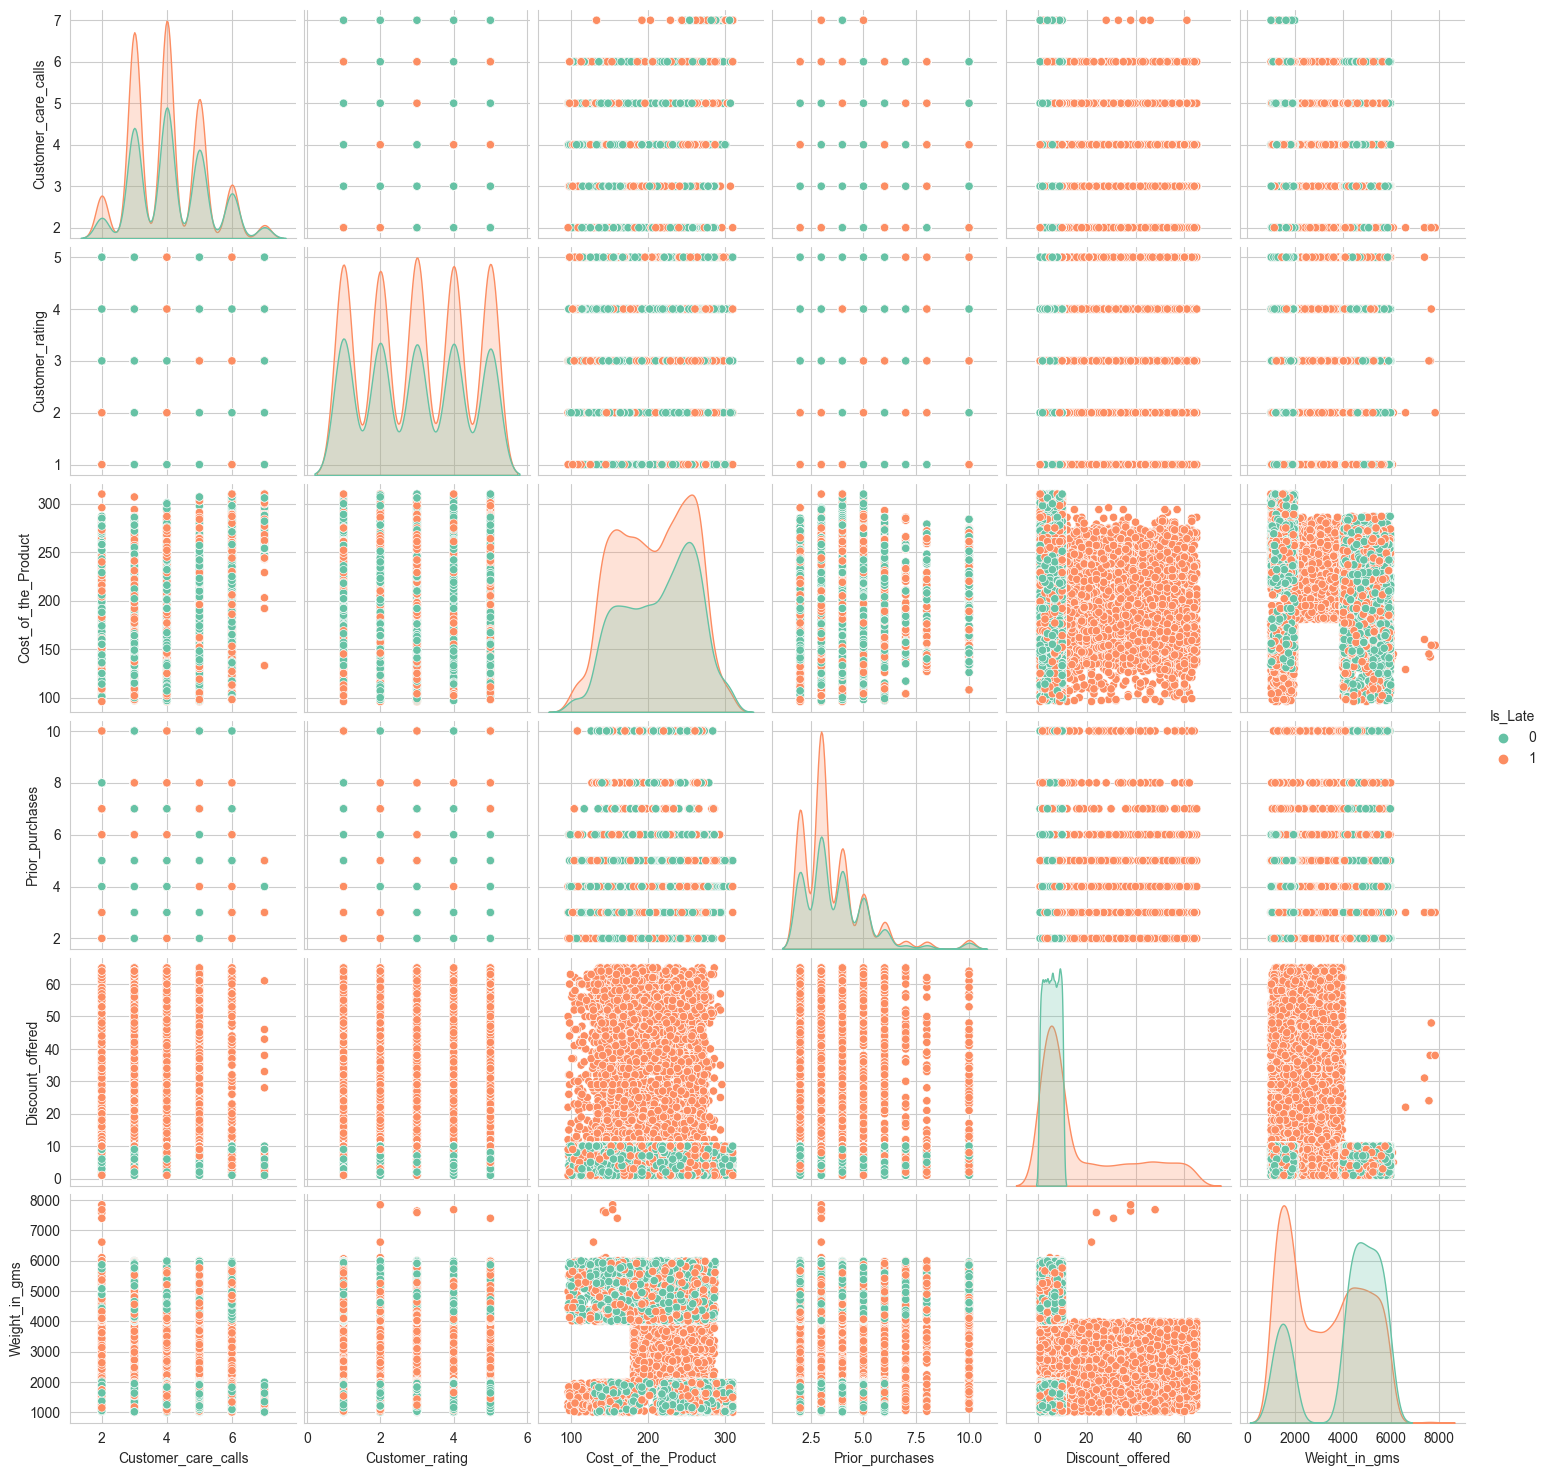

In [110]:
plt.figure(figsize=(10, 8))
sns.pairplot(df[number], diag_kind='kde', hue='Is_Late')
plt.show()

Terdapat pola pada column Discount_offered yang mana sekitar jumlah diskon lebih dari 15% berpeluang untuk produk Is_Late.
Terdapat pola pada column Weight_in_gms dimana persebaran barang yang Is_Late mayoritas terdapat pada jumlah berat 2000 - 4000 gram.

## Business Insight

### Persentase Orderan berdasarkan Discount Offered dan Is_Late

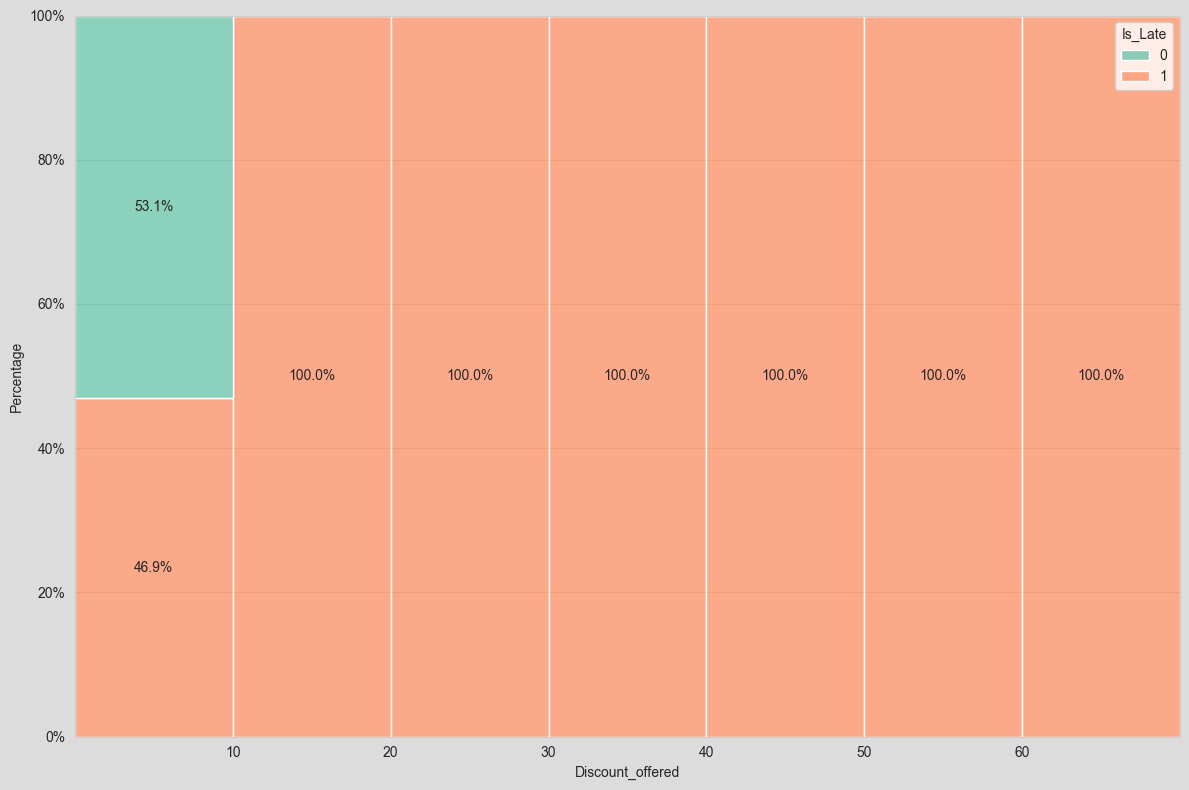

<Figure size 640x480 with 0 Axes>

In [111]:
plt.figure(figsize=(12, 8), facecolor='gainsboro')
ax = sns.histplot(data=df, x='Discount_offered', binwidth=10, binrange=(1, 65), hue='Is_Late', multiple='fill')
for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.set_ylabel('Percentage')
ax.set_xticks([11, 21, 31, 41, 51, 61])
ax.set_xticklabels(['10', '20', '30', '40', '50', '60'])
plt.tight_layout()
plt.show()

Berdasarkan persebaran data pada grafik terlihat bahwa penawaran diskon di atas 15%, semuanya merupakan barang yang Late. Sedangkan untuk penawaran diskonnya dibawah 15% terdapat barang yang dikirim ontime meskipun masih banyak orderan yang Late di atas 50%.

### Persentase Orderan berdasarkan Weight dan Is_Late

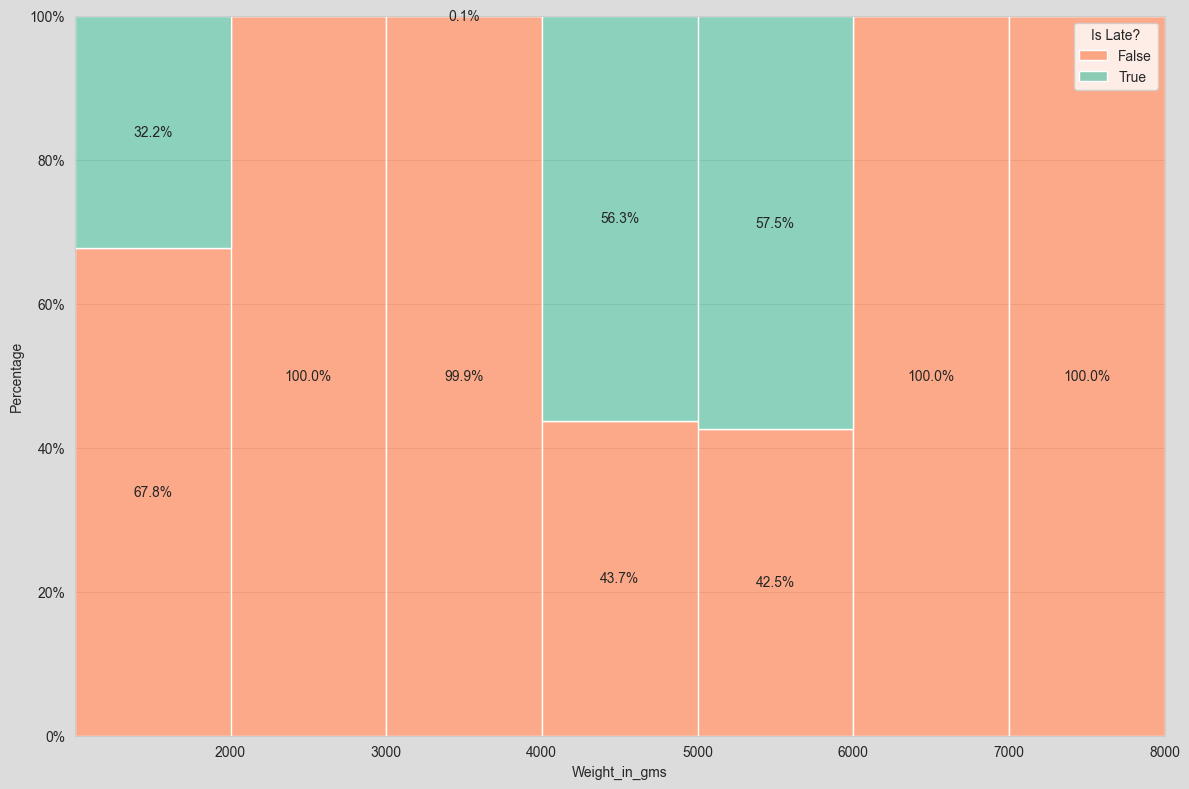

<Figure size 640x480 with 0 Axes>

In [112]:
plt.figure(figsize=(12, 8), facecolor='gainsboro')
ax = sns.histplot(data=df, x='Weight_in_gms', hue='Is_Late', binwidth=1000, multiple='fill')
for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.set_ylabel('Percentage')
ax.legend(title='Is Late?', labels=['False', 'True'])
plt.tight_layout()
plt.show()
plt.savefig('Weight.png', format='png', transparent=True)

Berdasarkan persebaran data pada grafik diatas terlihat bahwa berat sekitaran 2500-3500 gram  dan diatas 6000 gram, semuanya merupakan orderan barang yang Late. Sedangkan untuk barang yang memiliki berat 0-2500 gram  dan 3500-6500 gram  masih terdapat barang yang ontime meskipun masih terdapat barang yang late diatas 20%.

### Persebaran Orderan berdasarkan Weight, Discount Offered, dan Is_Late


In [113]:
sns.set_style("darkgrid")

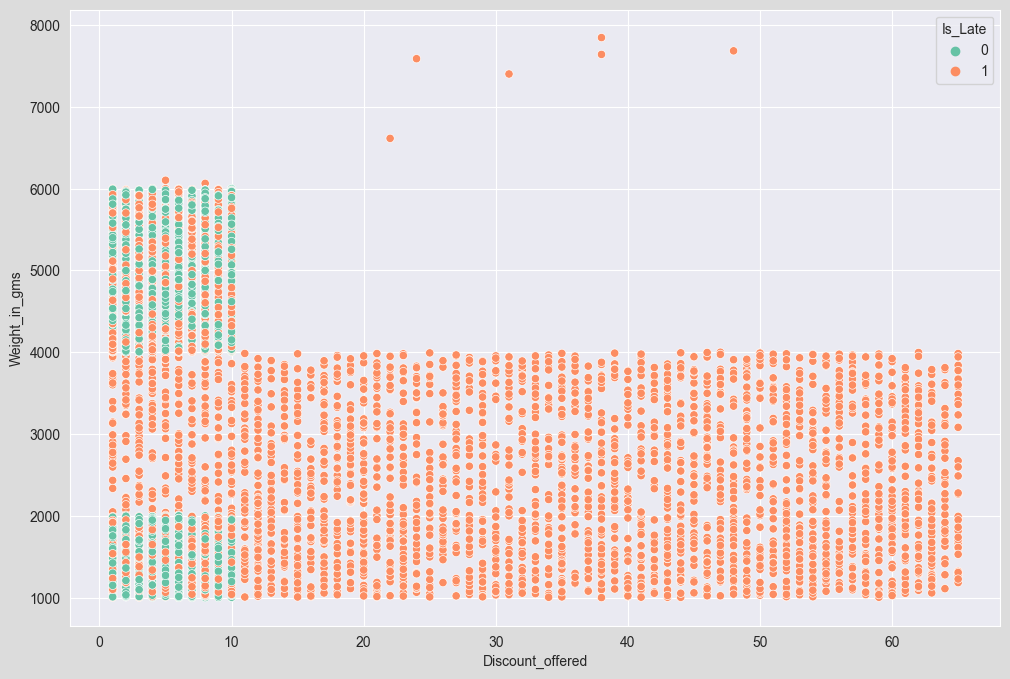

In [114]:
plt.figure(figsize=(12, 8), facecolor='gainsboro')
sns.scatterplot(data=df, x='Discount_offered', y='Weight_in_gms', hue='Is_Late')
plt.show()

Berdasarkan grafik terlihat bahwa semua barang yang memiliki berat 2000-4000 gram dan memiliki diskon di atas 10%, semuanya merupakan barang yang terlambat. Dan juga dengan berat 2000-4000 gram  yang memiliki diskon dibawah 10%, semuanya juga merupakan barang yang terlambat.


### Persentase Orderan berdasarkan Customer Care Calls dan Is_Late

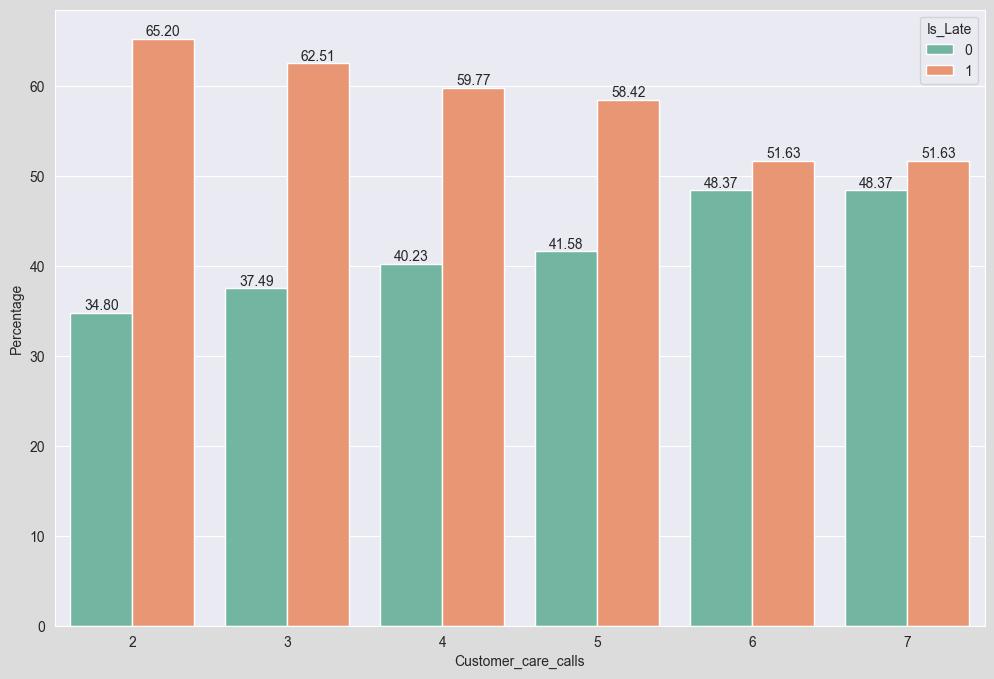

In [115]:
df_Customer_care_calls = df.groupby(['Customer_care_calls', 'Is_Late']).agg({
    'ID' : 'count'
}).reset_index()
df_total_Customer_care_calls = df_Customer_care_calls.groupby('Customer_care_calls').agg({'ID':'sum'}).reset_index()
df_Customer_care_calls = pd.merge(df_Customer_care_calls, df_total_Customer_care_calls, on='Customer_care_calls')
df_Customer_care_calls.columns = ['Customer_care_calls', 'Is_Late', 'Number_of_Order', 'Number_of_Order_by_Category']
df_Customer_care_calls['Percentage'] = df_Customer_care_calls.apply(lambda x: float(x['Number_of_Order'])/float(x['Number_of_Order_by_Category'])*100, axis=1)

plt.figure(figsize=(12, 8), facecolor='gainsboro')
ax = sns.barplot(data=df_Customer_care_calls, x="Customer_care_calls", y='Percentage', hue='Is_Late')
ax.bar_label(ax.containers[0], fmt='{:,.2f}')
ax.bar_label(ax.containers[1], fmt='{:,.2f}')
plt.show()

Jika dilihat dari grafik diatas semakin tinggi jumlah Customer_care_calls justru tidak merepresentasikan barang tersebut Late, yang terjadi justru sebaliknya. Hal ini mengidentifikasikan bahwa barang yang dikirim secara ontime tidak akan mengurangi Customer_care_calls.


### Persentase Mode of Shipment terhadap Persentase Is_Late


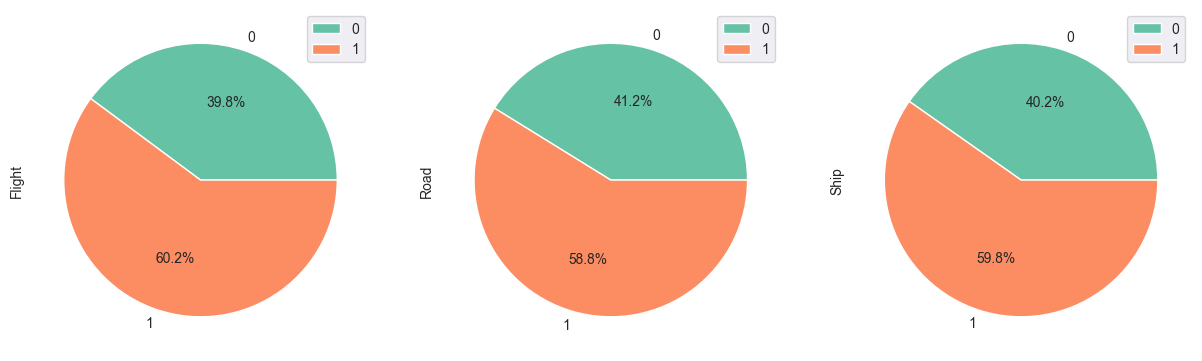

In [116]:
df_Mode_of_Shipment = df.groupby(['Mode_of_Shipment', 'Is_Late']).agg({
    'ID' : 'count'
}).reset_index()
df_total = df_Mode_of_Shipment.groupby('Mode_of_Shipment').agg({'ID':'sum'}).reset_index()
df_Mode_of_Shipment = pd.merge(df_Mode_of_Shipment, df_total, on='Mode_of_Shipment')
df_Mode_of_Shipment.columns = ['Mode_of_Shipment', 'Is_Late', 'Number_of_Order', 'Number_of_Order_by_Category']
df_Mode_of_Shipment['Percentage'] = df_Mode_of_Shipment.apply(lambda x: float(x['Number_of_Order'])/float(x['Number_of_Order_by_Category'])*100, axis=1)

df_1 = df.groupby(['Mode_of_Shipment', 'Is_Late']).agg({'ID':'nunique'})
df_1.reset_index().head()

dfp_1 = df_1.pivot_table(index = 'Mode_of_Shipment', columns = ['Is_Late'], values = 'ID')

dfp_1.T.plot.pie(subplots = True, autopct= '%.1f%%', colors = colorArr[:2], figsize=(15,5))
plt.show()

Berdasarkan pie plot di atas, dapat disimpulkan bahwa:
- Barang dengan mode shipment Flight memiliki persentase keterlambatan tertinggi dibandingkan mode shipment lainnya.
- Barang dengan mode shipment Road memiliki persentase keterlambatan terkecil dibandingkan kedua mode shipment lainnya.
- Namun Baik barang dengan mode of shipment ship, road, dan flight tetap mengalami persentase keterlambatan yang relatif besar.

### Persentase Product Importance terhadap Persentase Is_Late


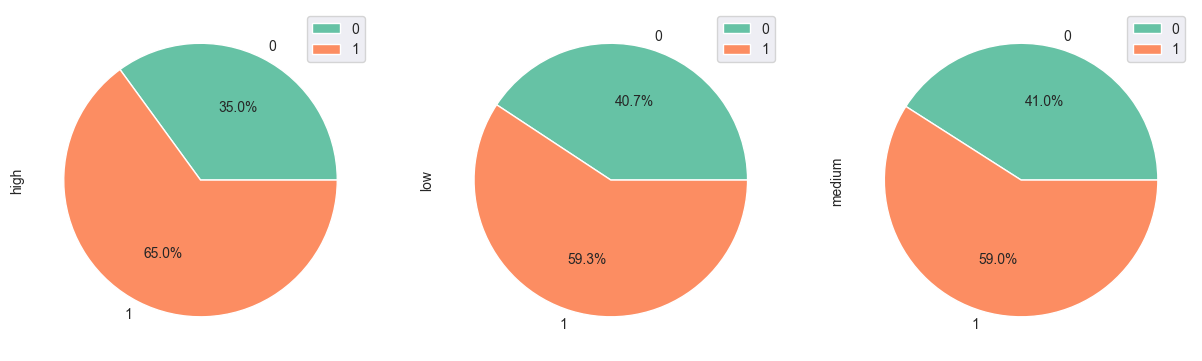

In [117]:
df_Product_importance = df.groupby(['Product_importance', 'Is_Late']).agg({
    'ID' : 'count'
}).reset_index()
df_total_importance = df_Product_importance.groupby('Product_importance').agg({'ID':'sum'}).reset_index()
df_Product_importance = pd.merge(df_Product_importance, df_total_importance, on='Product_importance')
df_Product_importance.columns = ['Product_importance', 'Is_Late', 'Number_of_Order', 'Number_of_Order_by_Category']
df_Product_importance['Percentage'] = df_Product_importance.apply(lambda x: float(x['Number_of_Order'])/float(x['Number_of_Order_by_Category'])*100, axis=1)

df_2 = df.groupby(['Product_importance', 'Is_Late']).agg({'ID': 'count'}).reset_index()

dfp_2 = df_2.pivot_table(index = 'Product_importance', columns = ['Is_Late'], values = 'ID')

dfp_2.T.plot.pie(subplots = True, autopct= '%.1f%%', colors = colorArr[:2], figsize=(15,5))
plt.show()

Baik barang dengan product importance high, medium, dan low tetap mengalami keterlambatan yang relatif besar.

## Business Recommendation

- Mengevaluasi kembali model perhitungan estimasi produk sampai (jika diperlukan buat kembali model yang lebih akurat).
- Meminimalisir keterlambatan pengiriman dengan mengevaluasi metode pengiriman (terutama pada mode shipment Flight) dan mempercepat proses packing.
- Mengevaluasi kembali berdasarkan pemberian diskon yang ditawarkan, terutama pada dua kategori yaitu pemberian diskon antara 0-10 dan lebih dari 10. Apa yang membedakan produk antara dua kategori tersebut. Mengapa barang yang memiliki banyak diskon semuanya tidak ontime.
- Mengevaluasi kembali berdasarkan beratnya, terdapat 3 kategori yang perlu difokuskan pada kategori ini yaitu 0-2000, 4000-6000, dan sisanya. Mengapa pada berat selain 0-2000 dan 4000-6000 tidak terdapat produk yang on-time.

---
# **Preprocessing Data**
---

## Missing value

In [118]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Is_Late                0
dtype: int64

Tiap kolom tidak menunjukkan adanya missing value

## Duplicate data

In [119]:
df.duplicated().sum()

0

Tiap kolom tidak menunjukkan adanya duplicated data

## Menyimpan data test sebelum dipreprocessing untuk simulasi

In [120]:
X = df.drop(['Is_Late','ID'], axis=1)
y = df['Is_Late']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state= 4)
X_train, X_test, y_train, y_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True), y_train.reset_index(drop=True), y_test.reset_index(drop=True)

In [122]:
print('Jumlah (baris,kolom) data train :', X_train.shape)
print('Jumlah (baris,kolom) data test:', X_test.shape)

Jumlah (baris,kolom) data train : (8799, 10)
Jumlah (baris,kolom) data test: (2200, 10)


In [123]:
df_simulation = X_test.copy()
df_simulation['Is_Late'] = y_test
df_simulation

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Is_Late
0,A,Ship,3,3,234,3,low,F,8,4839,1
1,C,Ship,5,5,262,5,low,M,2,1304,0
2,B,Ship,5,3,212,2,low,F,7,5219,0
3,A,Ship,4,1,190,10,low,F,35,3819,1
4,B,Ship,3,1,268,4,medium,F,4,5006,0
...,...,...,...,...,...,...,...,...,...,...,...
2195,B,Flight,6,2,229,3,medium,M,13,2322,1
2196,F,Flight,3,2,263,3,low,F,57,2113,1
2197,D,Ship,3,4,203,2,low,M,9,5735,0
2198,B,Ship,2,2,157,3,medium,F,9,4547,1


## Handling outlier data

In [124]:
number.remove('Is_Late')

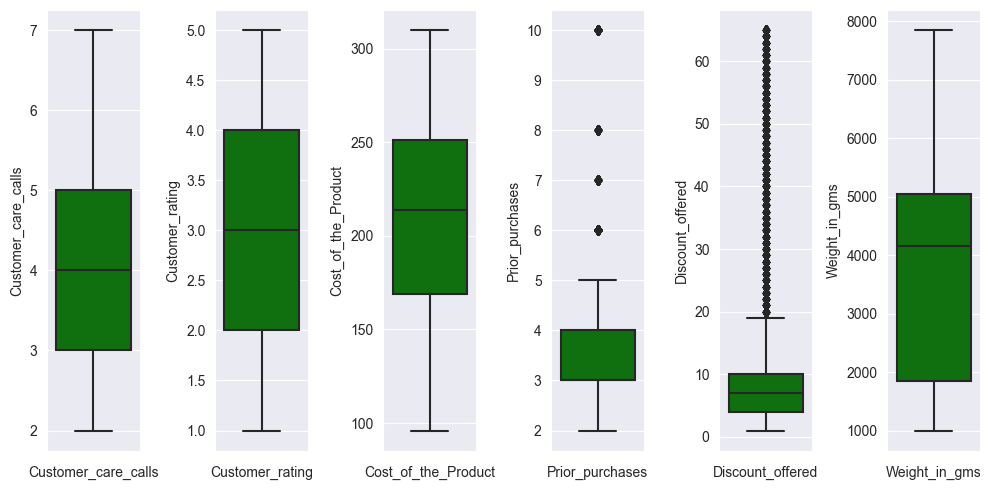

In [125]:
#train features
plt.figure(figsize=(10,5))
for i in range(len(number)):
  ax1 = plt.subplot(1,len(number), i+1)
  ax1 = sns.boxplot(y = number[i], data = df, color = 'green')
  ax1 = plt.xlabel(number[i])
  plt.tight_layout(h_pad=3.0)

Terdapat outlier pada **Discout_offered** dan **Prior_purchases** yang perlu dihandling. <br>

Dikarenakan dataset berjumlah hanya 10000, maka dilanjutkan dengan **Log transform** untuk handling outlier yang tidak merubah jumlah data. Jika menggunakan metode handling outlier *IQR* atau *zscore* dapat menghapus banyak data dan diperkirakan memengaruhi performa model nantinya

## Feature Transformation (Numeric)

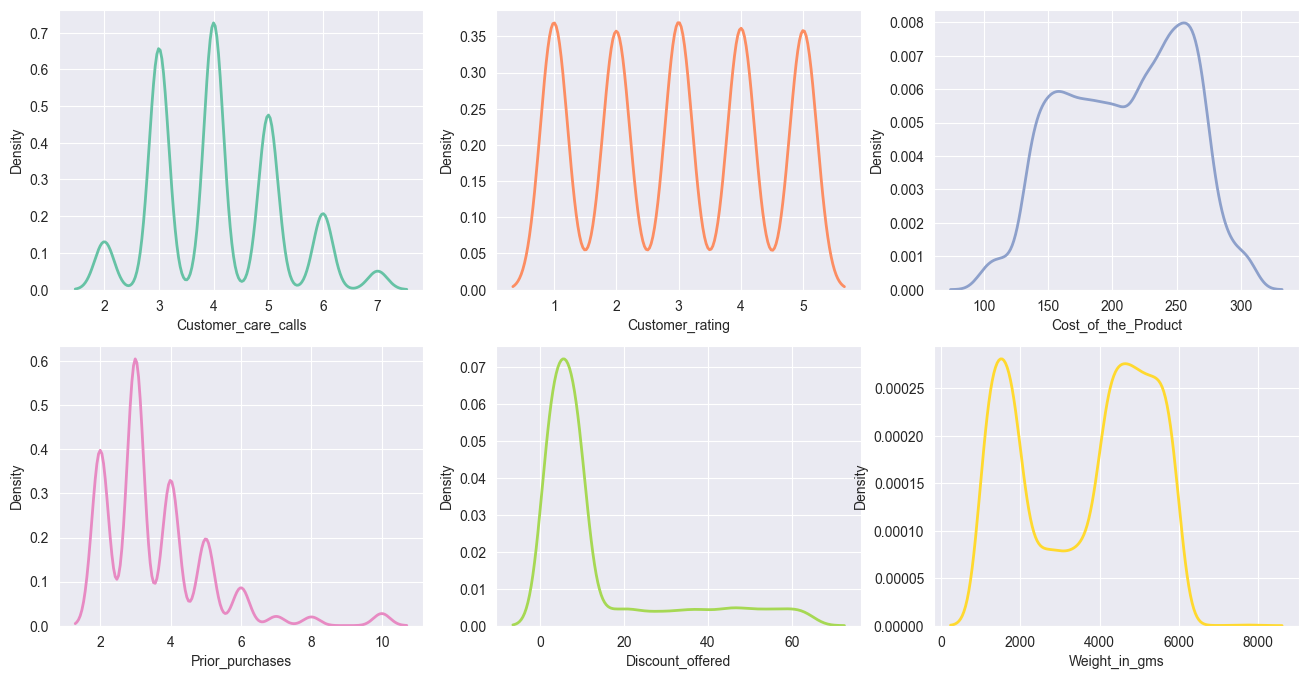

In [126]:
features = number[:6]
plt.figure(figsize=(16, 8))
for i in range(0, len(features)):
  plt.subplot(math.ceil(len(features)/3), 3, i+1)
  sns.kdeplot(data=df, x=features[i], linewidth=2, color=colorArr[i])

In [127]:
#Log transformation
df['Discount_offered'] = np.log(df['Discount_offered'])
df['Prior_purchases'] = np.log(df['Prior_purchases'])

# Menampilkan hasil log transformation
print(len(df['Discount_offered']))
print(df['Prior_purchases'])

10999
0        1.098612
1        0.693147
2        1.386294
3        1.386294
4        1.098612
           ...   
10994    1.609438
10995    1.609438
10996    1.609438
10997    1.791759
10998    1.609438
Name: Prior_purchases, Length: 10999, dtype: float64


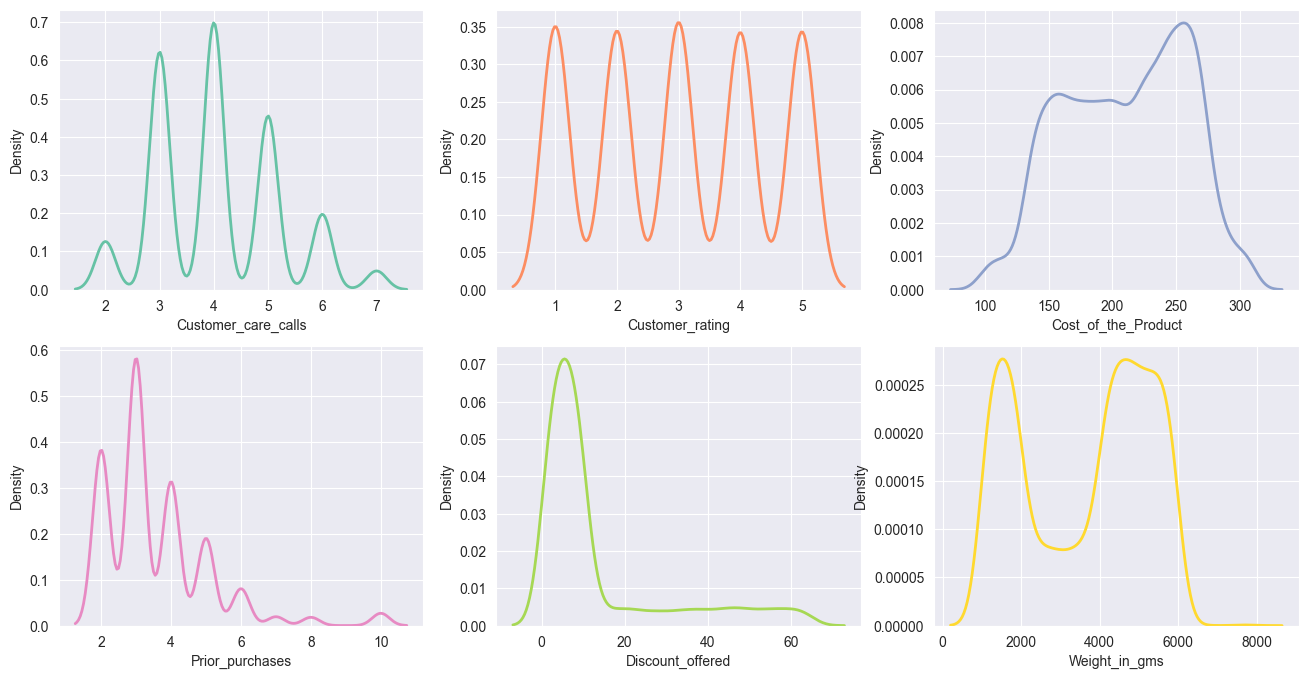

In [128]:
features = number[:6]
plt.figure(figsize=(16, 8))
for i in range(0, len(features)):
  plt.subplot(math.ceil(len(features)/3), 3, i+1)
  sns.kdeplot(data=X_train, x=features[i], linewidth=2, color=colorArr[i])

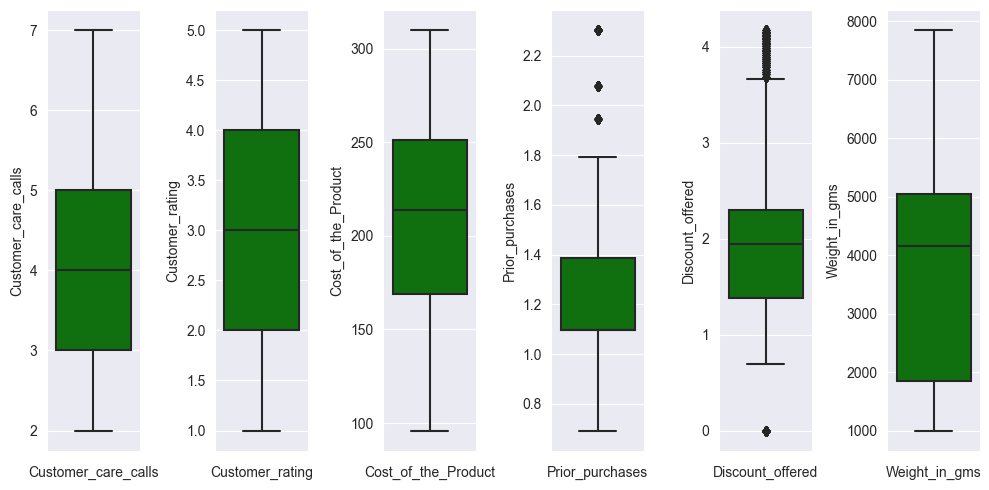

In [129]:
#train features
plt.figure(figsize=(10,5))
for i in range(len(number)):
  ax1 = plt.subplot(1,len(number), i+1)
  ax1 = sns.boxplot(y = number[i], data = df, color = 'green')
  ax1 = plt.xlabel(number[i])
  plt.tight_layout(h_pad=3.0)

## Splitting data

In [130]:
X = df.drop(['Is_Late','ID'], axis=1)
y = df['Is_Late']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state= 4)
X_train, X_test, y_train, y_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True), y_train.reset_index(drop=True), y_test.reset_index(drop=True)

In [132]:
print('Jumlah (baris,kolom) data train :', X_train.shape)
print('Jumlah (baris,kolom) data test:', X_test.shape)

Jumlah (baris,kolom) data train : (8799, 10)
Jumlah (baris,kolom) data test: (2200, 10)


## Feature Scalling

In [133]:
#StandarScaler
scaler = StandardScaler()
scaler.fit(X_train[['Cost_of_the_Product']])
X_train['Cost_of_the_Product'] = scaler.transform(X_train[['Cost_of_the_Product']])
X_test['Cost_of_the_Product'] = scaler.transform(X_test[['Cost_of_the_Product']])

#MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train[['Weight_in_gms']])
X_train['Weight_in_gms'] = scaler.transform(X_train[['Weight_in_gms']])
X_test['Weight_in_gms'] = scaler.transform(X_test[['Weight_in_gms']])

## Feature Encoding (Categoric)

In [134]:
#Label Encoding
mapping_Gender={
    'M' : 0,
    'F' : 1
}
X_train['Gender'] = X_train['Gender'].map(mapping_Gender)
X_test['Gender'] = X_test['Gender'].map(mapping_Gender)
mapping_Product_importance ={
    'low' : 0,
    'medium' : 1,
    'high' : 2
}
X_train['Product_importance'] = X_train['Product_importance'].map(mapping_Product_importance)
X_test['Product_importance'] = X_test['Product_importance'].map(mapping_Product_importance)

In [135]:
#one hot encoding Warehouse_block
OHE_Warehouse_block = OneHotEncoder(sparse=False)
OHE_Warehouse_block.fit(X_train[['Warehouse_block']])
df_OHE_Warehouse_block = pd.DataFrame(OHE_Warehouse_block.transform(X_train[['Warehouse_block']]))
df_OHE_Warehouse_block.columns = ['Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F']
X_train.drop(['Warehouse_block'], axis=1, inplace=True)
X_train = X_train.join(df_OHE_Warehouse_block)
X_train

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,Road,2,2,-1.216846,1.098612,0,1,4.110874,0.116728,1.0,0.0,0.0,0.0,0.0
1,Flight,3,3,-0.635329,1.945910,1,1,1.386294,0.594156,0.0,0.0,1.0,0.0,0.0
2,Ship,4,3,-1.009161,0.693147,0,0,0.693147,0.104164,0.0,0.0,0.0,1.0,0.0
3,Road,4,1,1.067683,1.791759,0,0,0.000000,0.091454,0.0,0.0,0.0,0.0,1.0
4,Flight,4,3,0.174640,1.609438,0,1,2.079442,0.102411,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,Road,6,3,1.213062,1.386294,0,0,1.098612,0.000730,0.0,0.0,0.0,0.0,1.0
8795,Ship,7,1,-0.386108,1.098612,0,0,3.637586,0.054200,0.0,0.0,0.0,0.0,1.0
8796,Road,4,4,-0.116118,0.693147,1,1,2.079442,0.712199,0.0,0.0,0.0,0.0,1.0
8797,Flight,5,4,-1.549141,1.386294,0,0,2.197225,0.652739,1.0,0.0,0.0,0.0,0.0


In [136]:
df_OHE_Warehouse_block = pd.DataFrame(OHE_Warehouse_block.transform(X_test[['Warehouse_block']]))
df_OHE_Warehouse_block.columns = ['Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F']
X_test.drop(['Warehouse_block'], axis=1, inplace=True)
X_test = X_test.join(df_OHE_Warehouse_block)
X_test

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,Ship,3,3,0.486167,1.098612,0,1,2.079442,0.560701,1.0,0.0,0.0,0.0,0.0
1,Ship,5,5,1.067683,1.609438,0,0,0.693147,0.044266,0.0,0.0,1.0,0.0,0.0
2,Ship,5,3,0.029261,0.693147,0,1,1.945910,0.616216,0.0,1.0,0.0,0.0,0.0
3,Ship,4,1,-0.427645,2.302585,0,1,3.555348,0.411687,1.0,0.0,0.0,0.0,0.0
4,Ship,3,1,1.192294,1.386294,1,1,1.386294,0.585099,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,Flight,6,2,0.382324,1.098612,1,0,2.564949,0.192988,0.0,1.0,0.0,0.0,0.0
2196,Flight,3,2,1.088451,1.098612,0,1,4.043051,0.162454,0.0,0.0,0.0,0.0,1.0
2197,Ship,3,4,-0.157655,0.693147,0,0,2.197225,0.691600,0.0,0.0,0.0,1.0,0.0
2198,Ship,2,2,-1.113004,1.098612,1,1,2.197225,0.518042,0.0,1.0,0.0,0.0,0.0


In [137]:
#one hot encoding 'Mode_of_Shipment'
OHE_Mode_of_Shipment = OneHotEncoder(sparse=False)
OHE_Mode_of_Shipment.fit(X_train[['Mode_of_Shipment']])
df_OHE_Mode_of_Shipment = pd.DataFrame(OHE_Mode_of_Shipment.transform(X_train[['Mode_of_Shipment']]))
df_OHE_Mode_of_Shipment.columns = ['Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship']
X_train.drop(['Mode_of_Shipment'], axis=1, inplace=True)
X_train = X_train.join(df_OHE_Mode_of_Shipment)
X_train


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,2,2,-1.216846,1.098612,0,1,4.110874,0.116728,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,3,-0.635329,1.945910,1,1,1.386294,0.594156,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,4,3,-1.009161,0.693147,0,0,0.693147,0.104164,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,1,1.067683,1.791759,0,0,0.000000,0.091454,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4,3,0.174640,1.609438,0,1,2.079442,0.102411,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,6,3,1.213062,1.386294,0,0,1.098612,0.000730,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8795,7,1,-0.386108,1.098612,0,0,3.637586,0.054200,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8796,4,4,-0.116118,0.693147,1,1,2.079442,0.712199,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8797,5,4,-1.549141,1.386294,0,0,2.197225,0.652739,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [138]:
df_OHE_Mode_of_Shipment = pd.DataFrame(OHE_Mode_of_Shipment.transform(X_test[['Mode_of_Shipment']]))
df_OHE_Mode_of_Shipment.columns = ['Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship']
X_test.drop(['Mode_of_Shipment'], axis=1, inplace=True)
X_test = X_test.join(df_OHE_Mode_of_Shipment)
X_test

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,3,3,0.486167,1.098612,0,1,2.079442,0.560701,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,5,1.067683,1.609438,0,0,0.693147,0.044266,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,5,3,0.029261,0.693147,0,1,1.945910,0.616216,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,-0.427645,2.302585,0,1,3.555348,0.411687,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,1,1.192294,1.386294,1,1,1.386294,0.585099,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,6,2,0.382324,1.098612,1,0,2.564949,0.192988,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2196,3,2,1.088451,1.098612,0,1,4.043051,0.162454,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2197,3,4,-0.157655,0.693147,0,0,2.197225,0.691600,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2198,2,2,-1.113004,1.098612,1,1,2.197225,0.518042,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Feature selection dengan Mutual Info Classification

In [139]:
mutual_info = mutual_info_classif(X_train, y_train, random_state=3)
mutual_info

array([0.00128029, 0.0054151 , 0.00371527, 0.0064681 , 0.0012963 ,
       0.        , 0.14513504, 0.12424957, 0.00489655, 0.00057292,
       0.        , 0.        , 0.        , 0.00219001, 0.01349656,
       0.0021476 ])

In [140]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Discount_offered           0.145135
Weight_in_gms              0.124250
Mode_of_Shipment_Road      0.013497
Prior_purchases            0.006468
Customer_rating            0.005415
Warehouse_block_A          0.004897
Cost_of_the_Product        0.003715
Mode_of_Shipment_Flight    0.002190
Mode_of_Shipment_Ship      0.002148
Product_importance         0.001296
Customer_care_calls        0.001280
Warehouse_block_B          0.000573
Gender                     0.000000
Warehouse_block_C          0.000000
Warehouse_block_D          0.000000
Warehouse_block_F          0.000000
dtype: float64

<Axes: >

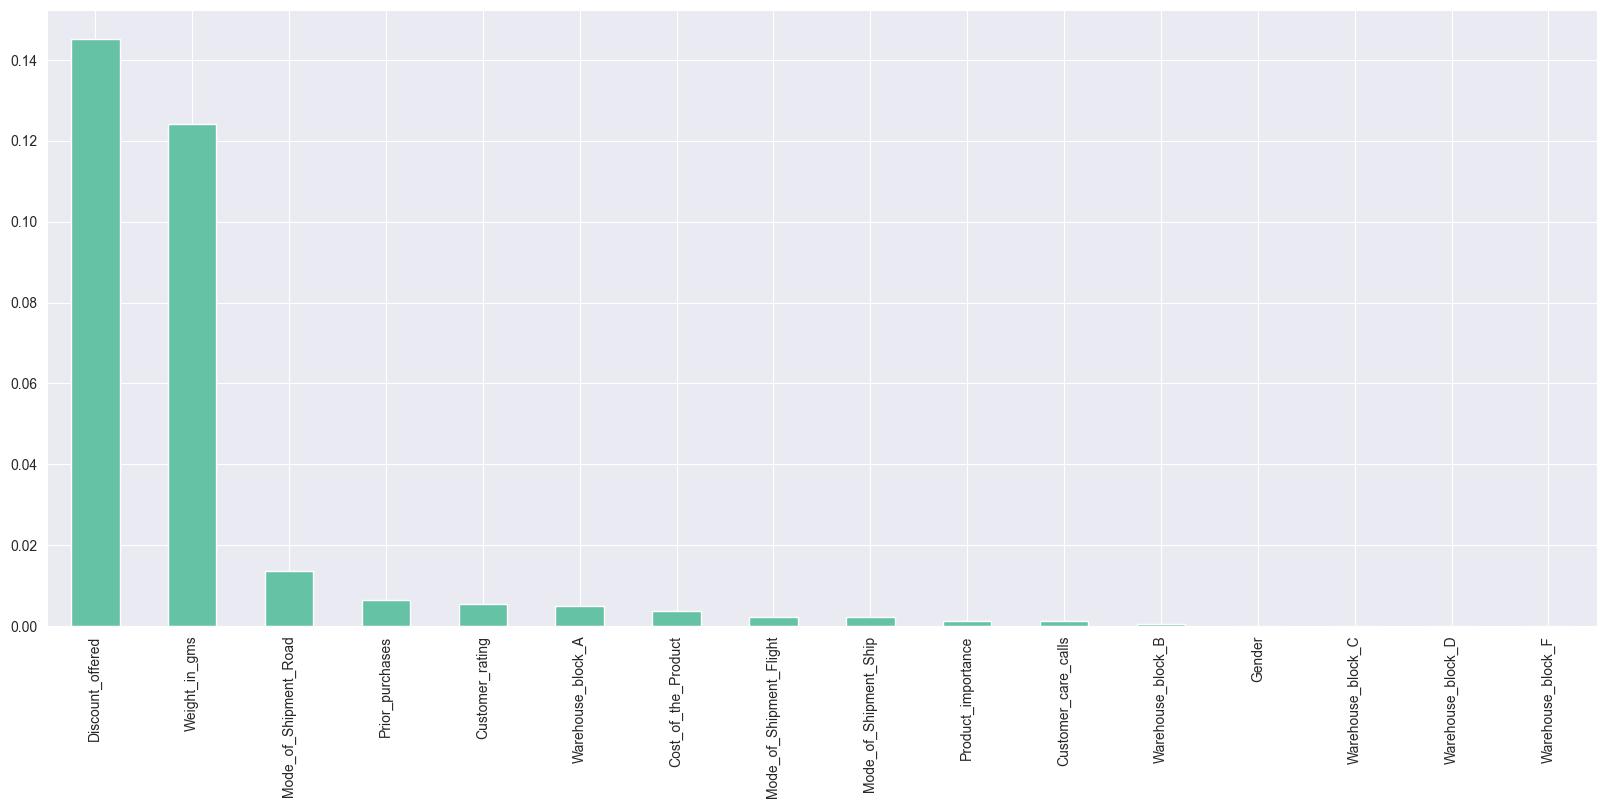

In [141]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Menggunakan semua fitur yang ada

In [142]:
X_train = X_train.drop(['Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F'], axis=1)
X_test = X_test.drop(['Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F'], axis=1)

In [143]:
X_train

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,2,2,-1.216846,1.098612,0,1,4.110874,0.116728,0.0,1.0,0.0
1,3,3,-0.635329,1.945910,1,1,1.386294,0.594156,1.0,0.0,0.0
2,4,3,-1.009161,0.693147,0,0,0.693147,0.104164,0.0,0.0,1.0
3,4,1,1.067683,1.791759,0,0,0.000000,0.091454,0.0,1.0,0.0
4,4,3,0.174640,1.609438,0,1,2.079442,0.102411,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8794,6,3,1.213062,1.386294,0,0,1.098612,0.000730,0.0,1.0,0.0
8795,7,1,-0.386108,1.098612,0,0,3.637586,0.054200,0.0,0.0,1.0
8796,4,4,-0.116118,0.693147,1,1,2.079442,0.712199,0.0,1.0,0.0
8797,5,4,-1.549141,1.386294,0,0,2.197225,0.652739,1.0,0.0,0.0


In [144]:
X_test

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,3,3,0.486167,1.098612,0,1,2.079442,0.560701,0.0,0.0,1.0
1,5,5,1.067683,1.609438,0,0,0.693147,0.044266,0.0,0.0,1.0
2,5,3,0.029261,0.693147,0,1,1.945910,0.616216,0.0,0.0,1.0
3,4,1,-0.427645,2.302585,0,1,3.555348,0.411687,0.0,0.0,1.0
4,3,1,1.192294,1.386294,1,1,1.386294,0.585099,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2195,6,2,0.382324,1.098612,1,0,2.564949,0.192988,1.0,0.0,0.0
2196,3,2,1.088451,1.098612,0,1,4.043051,0.162454,1.0,0.0,0.0
2197,3,4,-0.157655,0.693147,0,0,2.197225,0.691600,0.0,0.0,1.0
2198,2,2,-1.113004,1.098612,1,1,2.197225,0.518042,0.0,0.0,1.0


---
# **Model**
---

## Run Model

### Function

In [145]:
def eval_model(y_pred_test, y_pred_train, y_train, y_test):
    precision_test = precision_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    auroc_test = roc_auc_score(y_test, y_pred_test)
    auroc_train = roc_auc_score(y_train, y_pred_train)
    print('Precision (train) : ' + str(precision_train))
    print('Precision (test)  : ' + str(precision_test))
    print('Recall (train)    : ' + str(recall_train))
    print('Recall (test)     : ' + str(recall_test))
    print('Accuracy (train)  : ' + str(accuracy_train))
    print('Accuracy (test)   : ' + str(accuracy_test))
    print('F1-Score (train)  : ' + str(f1_train))
    print('F1-Score (test)   : ' + str(f1_test))
    print('Auroc (train)     : ' + str(auroc_train))
    print('Auroc (test)      : ' + str(auroc_test))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()
    result_train = [precision_train, recall_train, accuracy_train, f1_train, auroc_train]
    result_test = [precision_test, recall_test, accuracy_test, f1_test, auroc_test]
    return result_train, result_test

In [146]:
def proba_treshold(model, X_test, X_train):
    y_pred_test = model.predict_proba(X_test)[:,1]
    y_pred_train = model.predict_proba(X_train)[:,1]
    train = []
    test = []
    treshold = 0.4
    for i in(y_pred_train):
        if i > treshold:
            train.append(1)
        else:
            train.append(0)
    for i in(y_pred_test):
        if i > treshold:
            test.append(1)
        else:
            test.append(0)
    return train, test

In [147]:
def latih_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train, y_pred_test = proba_treshold(model, X_test, X_train)
    result_train, result_test = eval_model(y_pred_test, y_pred_train, y_train, y_test)
    return model, result_train, result_test

In [148]:
def crossval(model, X_train, y_train):
    score = cross_validate(model, X_train, y_train, cv=5, scoring='recall', return_train_score=True)
    print('Recall standard deviation (cross-val train): ' + str(score['train_score'].std()))
    print('Recall mean (cross-val train): ' + str(score['train_score'].mean()))
    print('Recall mean (cross-val test): ' + str(score['test_score'].mean()))

### Logistic Regression

Precision (train) : 0.6281254316894599
Precision (test)  : 0.6282404853833425
Recall (train)    : 0.8670861937452327
Recall (test)     : 0.8635329795299469
Accuracy (train)  : 0.6148425957495169
Accuracy (test)   : 0.6118181818181818
F1-Score (train)  : 0.7285107746535289
F1-Score (test)   : 0.7273307790549169
Auroc (train)     : 0.5549214372382985
Auroc (test)      : 0.549246625973827


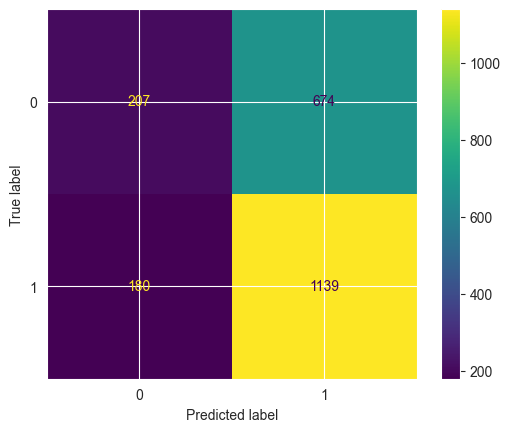

In [149]:
logistic, result_train_logistic, result_test_logistic = latih_model(LogisticRegression(random_state=3), X_train, X_test, y_train, y_test)

In [150]:
crossval(logistic, X_train, y_train)

Recall standard deviation (cross-val train): 0.0019933744281977863
Recall mean (cross-val train): 0.7402745449153573
Recall mean (cross-val test): 0.7393220733668562


### K-Nearest Neighbors

Precision (train) : 0.8184870630061228
Precision (test)  : 0.7070467141726049
Recall (train)    : 0.7902364607170099
Recall (test)     : 0.6770280515542078
Accuracy (train)  : 0.7705421070576202
Accuracy (test)   : 0.6381818181818182
F1-Score (train)  : 0.8041137091297177
F1-Score (test)   : 0.691711851278079
Auroc (train)     : 0.7658636593317821
Auroc (test)      : 0.6285253765149018


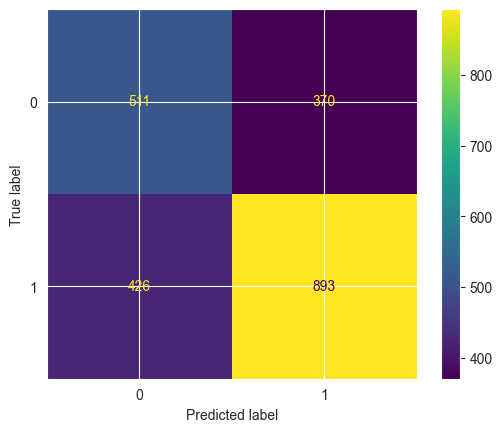

In [151]:
knn, result_train_knn, result_test_knn = latih_model(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

In [152]:
crossval(knn, X_train, y_train)

Recall standard deviation (cross-val train): 0.003289227344342071
Recall mean (cross-val train): 0.7851353181587323
Recall mean (cross-val test): 0.6664786164940801


### Decision Tree

Precision (train) : 1.0
Precision (test)  : 0.7124528301886792
Recall (train)    : 1.0
Recall (test)     : 0.7156937073540561
Accuracy (train)  : 1.0
Accuracy (test)   : 0.6563636363636364
F1-Score (train)  : 1.0
F1-Score (test)   : 0.7140695915279879
Auroc (train)     : 1.0
Auroc (test)      : 0.6416152986259498


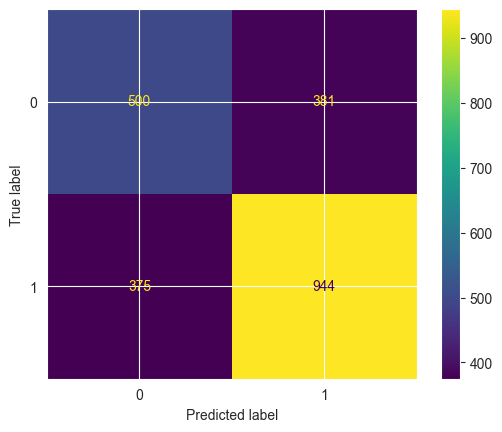

In [153]:
decisiontree, result_train_decisiontree, result_test_decisiontree = latih_model(DecisionTreeClassifier(random_state=3), X_train, X_test, y_train, y_test)

In [154]:
crossval(decisiontree, X_train, y_train)

Recall standard deviation (cross-val train): 0.0
Recall mean (cross-val train): 1.0
Recall mean (cross-val test): 0.7067168659355694


### Random Forest

Precision (train) : 0.999809342230696
Precision (test)  : 0.6577639751552795
Recall (train)    : 1.0
Recall (test)     : 0.8028809704321456
Accuracy (train)  : 0.9998863507216729
Accuracy (test)   : 0.6313636363636363
F1-Score (train)  : 0.9999046620268853
F1-Score (test)   : 0.7231136906794128
Auroc (train)     : 0.99985935302391
Auroc (test)      : 0.5887276588823611


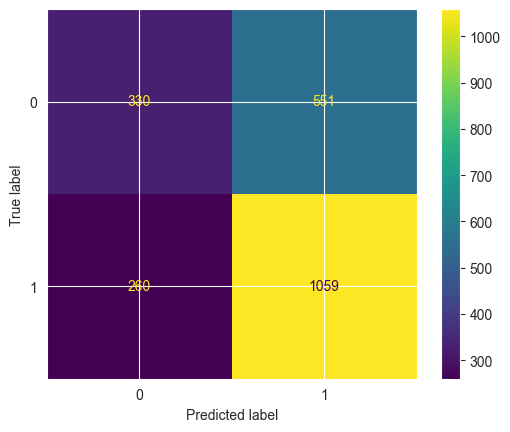

In [155]:
randomforest, result_train_randomforest, result_test_randomforest = latih_model(RandomForestClassifier(random_state=3), X_train, X_test, y_train, y_test)

In [156]:
crossval(randomforest, X_train, y_train)

Recall standard deviation (cross-val train): 0.0
Recall mean (cross-val train): 1.0
Recall mean (cross-val test): 0.6405437021081509


### AdaBoost

Precision (train) : 0.5959768155472213
Precision (test)  : 0.5995454545454545
Recall (train)    : 1.0
Recall (test)     : 1.0
Accuracy (train)  : 0.5959768155472213
Accuracy (test)   : 0.5995454545454545
F1-Score (train)  : 0.7468489638966034
F1-Score (test)   : 0.7496447854504119
Auroc (train)     : 0.5
Auroc (test)      : 0.5


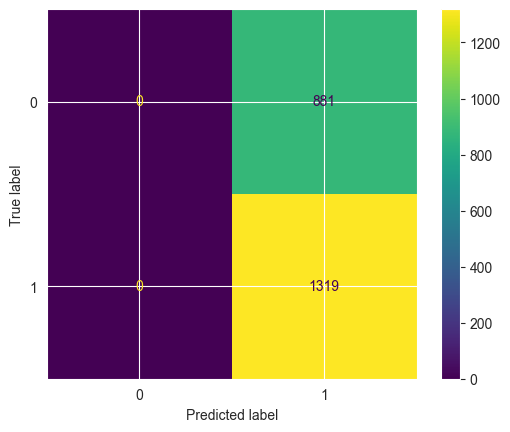

In [157]:
adaboost, result_train_adaboost, result_test_adaboost = latih_model(AdaBoostClassifier(random_state=3), X_train, X_test, y_train, y_test)

In [158]:
crossval(adaboost, X_train, y_train)

Recall standard deviation (cross-val train): 0.015009183447072598
Recall mean (cross-val train): 0.6127945679579053
Recall mean (cross-val test): 0.5930662790443825


### XGBoost

Precision (train) : 0.8605401732631222


Precision (test)  : 0.6826987307949232
Recall (train)    : 0.9660564454614798
Recall (test)     : 0.7748294162244125
Accuracy (train)  : 0.8864643709512444
Accuracy (test)   : 0.649090909090909
F1-Score (train)  : 0.910250651334112
F1-Score (test)   : 0.7258522727272727
Auroc (train)     : 0.8675570553608384
Auroc (test)      : 0.6178346854107306


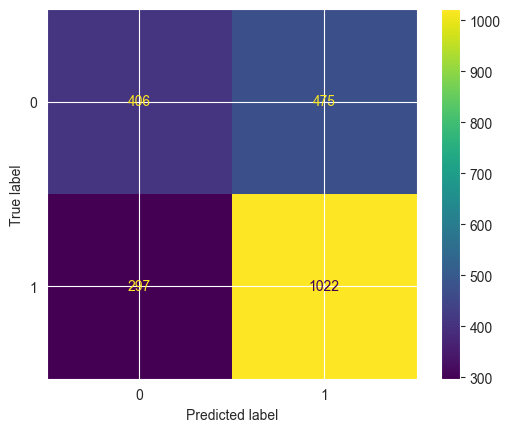

In [159]:
xgboost, result_train_xgboost, result_test_xgboost = latih_model(XGBClassifier(random_state=3), X_train, X_test, y_train, y_test)

Precision (train) : 0.925111441307578
Precision (test)  : 0.8611764705882353
Recall (train)    : 0.5936308161708619
Recall (test)     : 0.5549658832448825
Accuracy (train)  : 0.7291737697465621
Accuracy (test)   : 0.6795454545454546
F1-Score (train)  : 0.7231966546637241
F1-Score (test)   : 0.6749654218533887
Auroc (train)     : 0.7613723701107474
Auroc (test)      : 0.7105135886144958


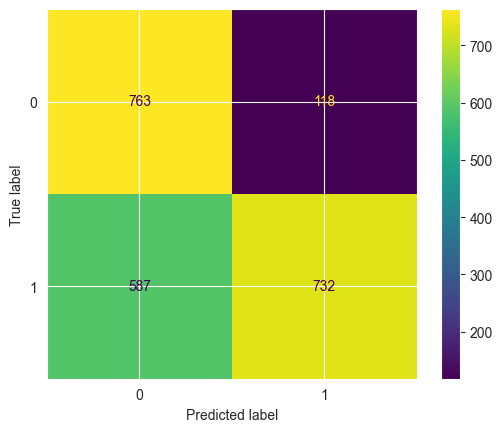

In [160]:
xg = XGBClassifier()
eval_set = [(X_test,y_test)]
xgboost = xg.fit(X_train, y_train, early_stopping_rounds=20, eval_set=eval_set, eval_metric='logloss',verbose=False)
y_pred_test = xgboost.predict(X_test)
y_pred_train = xgboost.predict(X_train)
result_train_xgboost, result_test_xgboost = eval_model(y_pred_test, y_pred_train, y_train, y_test)

In [161]:
crossval(xgboost, X_train, y_train)

Recall standard deviation (cross-val train): 0.008253607456819861
Recall mean (cross-val train): 0.9054633336022387
Recall mean (cross-val test): 0.664761605018229


## Best Model

In [162]:
modelName = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
result = [[result_train_logistic[1], result_train_knn[1], result_train_decisiontree[1], result_train_randomforest[1], result_train_adaboost[1], result_train_xgboost[1]], [result_test_logistic[1], result_test_knn[1], result_test_decisiontree[1], result_test_randomforest[1], result_test_adaboost[1], result_test_xgboost[1]]]

In [163]:
df_result = pd.DataFrame(result, columns=modelName, index=['Train', 'Test'])
df_result

,Logistic Regression,K-Nearest Neighbors,Decision Tree,Random Forest,AdaBoost,XGBoost
Train,0.867086,0.790236,1.000000,1.000000,1.0,0.593631
Test,0.863533,0.677028,0.715694,0.802881,1.0,0.554966


Berdasarkan hasil dari evaluasi recall maka model dengan nilai recall tertinggi dan masuk akal ada pada model logistic regression. Maka model ini akan digunakan untuk proses selanjutnya.

## Hyperparameter Tuning

Precision (train) : 0.6235294117647059
Precision (test)  : 0.6207081545064378
Recall (train)    : 0.8792906178489702
Recall (test)     : 0.8771796815769523
Accuracy (train)  : 0.6116604159563587
Accuracy (test)   : 0.605
F1-Score (train)  : 0.729646332779492
F1-Score (test)   : 0.7269871190700598
Auroc (train)     : 0.548084127489886
Auroc (test)      : 0.5373412596307009


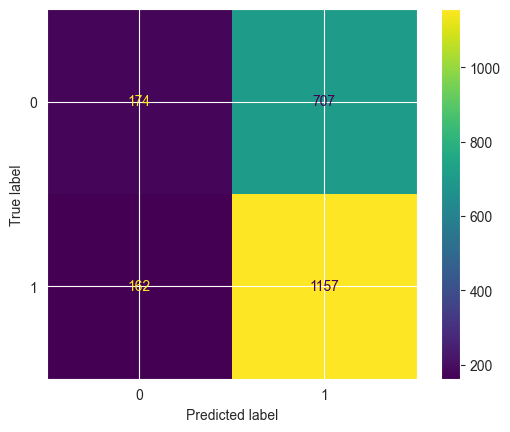

In [164]:
penalty = ['l1', 'l2', 'elasticnet', None]
C = [x for x in np.linspace(0, 2, 50)]
max_iter = [int(x) for x in np.linspace(50, 500, 50)]
hyperparameters_logistic = dict(penalty=penalty,
                                 C=C,
                                 max_iter=max_iter)
logisticTuned, result_train_logistic_Tuned, result_train_logistic_Tuned = latih_model(GridSearchCV(LogisticRegression(random_state=3), hyperparameters_logistic, scoring='recall', cv=5), X_train, X_test, y_train, y_test)

In [165]:
crossval(logisticTuned.best_estimator_, X_train, y_train)

Recall standard deviation (cross-val train): 0.001561900339822942
Recall mean (cross-val train): 0.7609648669315574
Recall mean (cross-val test): 0.7599192979136801


In [166]:
logisticTuned.best_params_

{'C': 0.04081632653061224, 'max_iter': 50, 'penalty': 'l2'}

Precision (train) : 0.623411732900784
Precision (test)  : 0.619914346895075
Recall (train)    : 0.8794813119755912
Recall (test)     : 0.8779378316906747
Accuracy (train)  : 0.6115467666780315
Accuracy (test)   : 0.6040909090909091
F1-Score (train)  : 0.7296313874386964
F1-Score (test)   : 0.7267022278004392
Auroc (train)     : 0.5478981806010164
Auroc (test)      : 0.5360177240178685


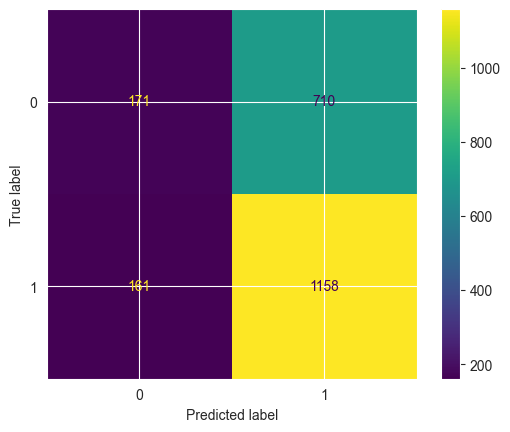

In [167]:
logisticFinal, result_train_logisticFinal, result_test_logisticFinal = latih_model(LogisticRegression(random_state=3, C= 0.04081632653061224, max_iter=59, penalty='l2'), X_train, X_test, y_train, y_test)

## Feature Importance SHAP

In [168]:
explainer = shap.Explainer(
    logisticFinal, X_train, feature_names=X_train.columns.to_list()
)
shap_values = explainer(X_test)

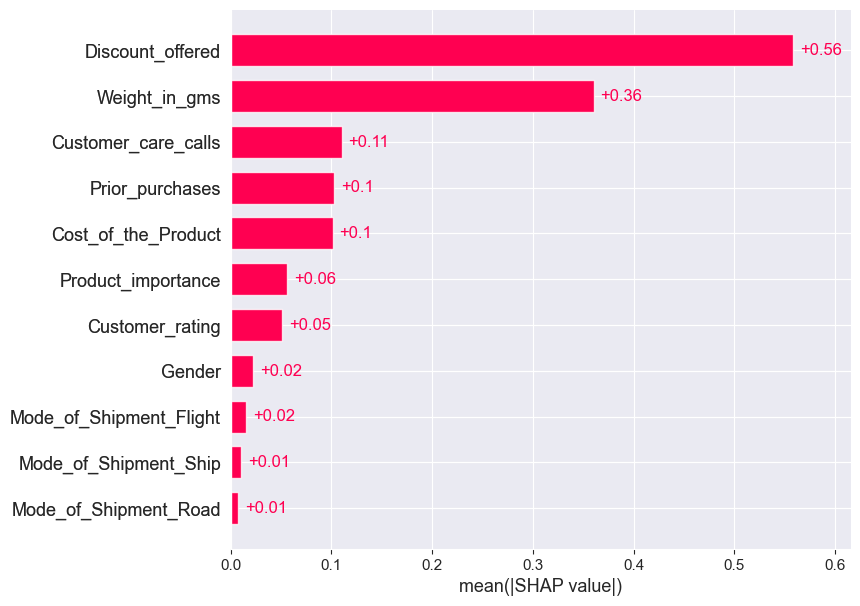

In [169]:
shap.plots.bar(shap_values, max_display=17)

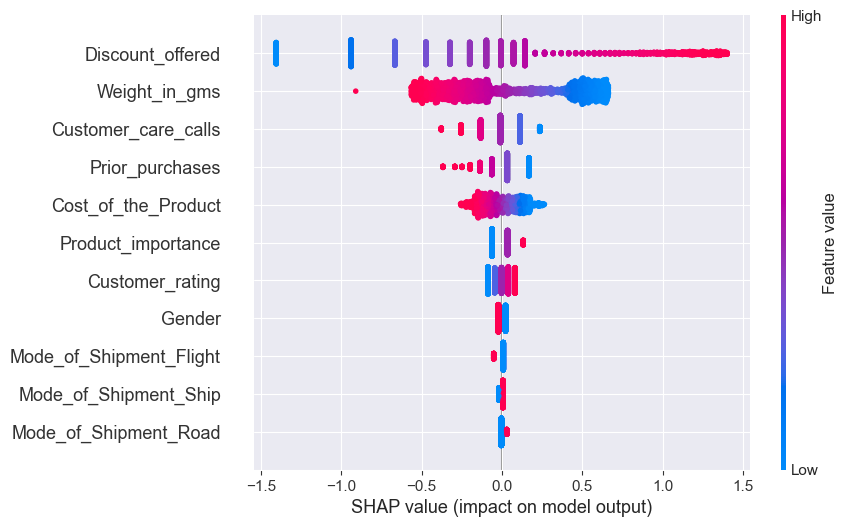

In [170]:
shap.plots.beeswarm(shap_values, max_display=17)

Top 5 feature dalam model bisnis berikut adalah: Discount Offered, Weight in gms, Customer Care Calls, Prior Purchase, dan Cost of The Product. Kelima feature tersebut sangat mempengaruhi kelas target, yaitu Is_Late.
- Pada bagian Discount Offered, terlihat bahwa semakin tinggi nilai discount semakin banyak barang yang datang terlambat.
- Pada bagian Weight in gms, barang yang lebih ringan cenderung mengalami keterlambatan dibandingkan dengan barang berat.
- Pada bagian Customer Care Calls, Customer Care Calls dengan jumlah kecil cenderung mengalami keterlambatan pengiriman barang.
- Pada bagian Prior Purchase, banyaknya keterlambatan barang didominasi oleh Prior Purchase yang rendah.
- Pada bagian Cost of The Product, Product dengan harga yang rendah cenderung mengalami keterlambatan dibandingkan Product dengan harga yang tinggi.


## Recommendation

Beberapa bisnis rekomendasi yang dapat diberikan:
- Mengevaluasi dan mengoptimalisasi kinerja tim marketing terutama dalam pemberian diskon serta penentuan harga produk. Diskon harus disesuaikan dengan jenis produk, berat produk, dan biaya penanganan.
- Mengevaluasi dan mengoptimalisasi kinerja tim gudang berkaitan dengan stock barang dengan monitoring ketersediaan produk secara real-time.
- Mengevaluasi dan mengoptimalisasi kinerja tim logistik yang berkaitan dengan packing dan pengiriman barang. Bisa dengan menambah jumlah manpower maupun mengatur jadwal pengiriman barang berdasarkan waktu pembayaran.
- Fokus mengoptimalkan pengiriman jarak jauh seperti memusatkan distribusi secara lokal dengan membuat rute pengiriman yang paling efisien, same-day delivery services, dan partnership dengan kurir lokal.

---
# **Business Simulation**
---

In [171]:
df_simulation

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Is_Late
0,A,Ship,3,3,234,3,low,F,8,4839,1
1,C,Ship,5,5,262,5,low,M,2,1304,0
2,B,Ship,5,3,212,2,low,F,7,5219,0
3,A,Ship,4,1,190,10,low,F,35,3819,1
4,B,Ship,3,1,268,4,medium,F,4,5006,0
...,...,...,...,...,...,...,...,...,...,...,...
2195,B,Flight,6,2,229,3,medium,M,13,2322,1
2196,F,Flight,3,2,263,3,low,F,57,2113,1
2197,D,Ship,3,4,203,2,low,M,9,5735,0
2198,B,Ship,2,2,157,3,medium,F,9,4547,1


Jumlah barang yang on time

In [172]:
len(df_simulation[df_simulation['Is_Late'] == 0])

881

Jumlah barang yang terlambat

In [173]:
len(df_simulation[df_simulation['Is_Late'] == 1])

1319

## Shipment Cost

In [174]:
def shipmentCost(X):
    if X['Mode_of_Shipment'] == 'Road':
        return X['Weight_in_kg'] * 2
    elif X['Mode_of_Shipment'] == 'Ship':
        return X['Weight_in_kg'] * 4
    elif X['Mode_of_Shipment'] == 'Flight':
        return X['Weight_in_kg'] * 8
df_simulation['Weight_in_kg'] = df_simulation['Weight_in_gms'] / 1000
df_simulation['Weight_in_kg'] = df_simulation['Weight_in_kg'].apply(np.ceil)
df_simulation['Shipment_cost'] = df_simulation.apply(lambda X: shipmentCost(X), axis=1)
total_shipment_cost = df_simulation['Shipment_cost'].sum()
print('Total Shipment Cost :', total_shipment_cost)

Total Shipment Cost : 39536.0


In [175]:
shipment_per_product = total_shipment_cost/2200
print('Shipment cost per product :', shipment_per_product)

Shipment cost per product : 17.970909090909092


## Potential Revenue Loss

In [176]:
total_sales = df_simulation['Cost_of_the_Product'].sum()
print('Total Sales :', total_sales)

Total Sales : 458964


In [177]:
df_simulation['discount_prices'] = df_simulation['Cost_of_the_Product'] * (df_simulation['Discount_offered']/100)
total_diskon = df_simulation['discount_prices'].sum()
print('Total Diskon :', total_diskon)

Total Diskon : 59047.91


In [178]:
total_revenue = total_sales - total_diskon 
print('Total Revenue :', total_revenue)

Total Revenue : 399916.08999999997


In [179]:
revenue_per_product = total_revenue/2200
print('Revenue per product :', revenue_per_product)

Revenue per product : 181.7800409090909


In [180]:
potential_revenue_loss = revenue_per_product * 1319
print('Potential Revenue Loss :', potential_revenue_loss)

Potential Revenue Loss : 239767.8739590909


## Barang yang dapat dikirim on time

In [181]:
#perproduct
biaya_tambahan_agar_ontime = shipment_per_product * 2
print('Harga per produk agar on time :', biaya_tambahan_agar_ontime)

Harga per produk agar on time : 35.941818181818185


In [182]:
biaya_tambahan_agar_ontime = 50000 / 36
print('Produk yang dapat diberikan tambahan biaya :', biaya_tambahan_agar_ontime)

Produk yang dapat diberikan tambahan biaya : 1388.888888888889


## Penurunan late rate

In [183]:
late_after = 2200 - (1389+171)
print('Jumlah produk terlambat setelah diberikan treatment :', late_after)

Jumlah produk terlambat setelah diberikan treatment : 640


In [184]:
penurunan_late = 1319 - 640
penurunan_late_rate = (penurunan_late/1319) * 100
print('Penurunan late :', penurunan_late)
print('Penurunan late rate :', penurunan_late_rate)

Penurunan late : 679
Penurunan late rate : 51.4783927217589


## Potential Revenue Loss After Treatment

In [185]:
after_treatment = revenue_per_product * 640
print('Potential Revenue Loss After Treatment :', after_treatment)

Potential Revenue Loss After Treatment : 116339.22618181817


In [186]:
print('Penurunan Potential Revenue Loss :',potential_revenue_loss - after_treatment)

Penurunan Potential Revenue Loss : 123428.64777727274


In [187]:
(potential_revenue_loss - after_treatment)/potential_revenue_loss

0.5147839272175891